In [ ]:
# 기본적인 라이브러리(기초세션에서 다룸)
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 구글 드라이브 연동

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 예제 1

사용할 데이터 : bike.csv

주어진 데이터는 서울시 공공데이터인 자전거 대여 수를 나타낸 데이터로 아래와 같다. 데이터에는 자전거 대여 수와 함께 ID, 시간, 날씨 등의 정보를 포함하고 있다.

서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터
즉, 따릉이 보관소별로 매일 자전거 대여

* id : 마포구에 있는 따릉이 보관소의 고유 id
* hour : 따릉이 보관소에서 기상상황을 측정한 시간
* temperature : 기온
* precipitation : 비가 오지 않았으면 0, 비가 오면 1, null은 비가 온 것도 아니고 안 온 것도 아니라서 센서가 확실히 측정불가한 상태
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존
* pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 측정한 날짜의 따릉이 대여 수

> 데이터 출처 : https://www.dacon.io/competitions/open/235576/data

## 데이터 불러오기

In [ ]:
path = '/content/drive/MyDrive/세션자료/bike.csv'
bike = pd.read_csv(path)
bike.head()

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  count  
0            33.0     49  
1            40.0    159  
2            19.0     26  
3            64.0     57  
4            11.0    431

## 어떤 Task인지 파악하기

데이터 구조 확인 및 어떤 task인지 파악을 한다.

In [ ]:
# (행,열)
# 행의 수 = 데이터(표본)의 갯수 = 1459
# 열의 수 = features들의 갯수 = 11

bike.shape

(1459, 11)

In [ ]:
# features 살펴보기

bike.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

(array([413., 237., 327., 188., 120.,  83.,  47.,  33.,   6.,   5.]),
 array([  1.,  44.,  87., 130., 173., 216., 259., 302., 345., 388., 431.]),
 <a list of 10 Patch objects>)

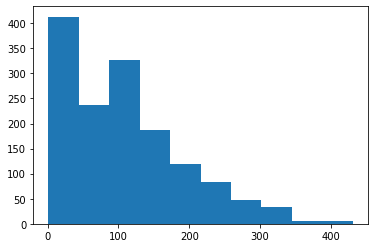

In [ ]:
# y값 = 'count(자전거 대여 대수)'열

# y(label)값 뜯어내기
y_label = bike.loc[:,'count']

# y값 분포 확인
y_label.value_counts()
plt.hist(y_label.values)

# 결론
# y값 = exist -> Supervised
# y값 = 연속형 -> regression

In [ ]:
# 위의 y값을 제외한 진정한 X값들로 이루어진 features 만들기

X_features = bike.drop(['count'], axis=1)
X_features.columns # 10개의 열들이 진정한 X_features로 사용

# 즉, 10개의 X_features열들로 1개의 y_label인 'count'를 맞추는 문제
# 여기서 행은 데이터의 갯수, 즉 이러한 갯수의 데이터를 이용해 학습을 시킨다는 의미

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [ ]:
# X_features 열들이 ['연속형','범주형']인지 확인

# 1~5번째 행(데이터)
X_features.head()

# 범주형 데이터 : 'hour_bef_precipitation'
# 연속형 데이터 : 나머지

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  
0            33.0  
1            40.0  
2            19.0  
3            64.0  
4            11.0

* 지금까지 배운 모델 중 회귀문제를 풀 수 있는 모델은 '선형회귀'이다.

> * 선형회귀의 경우, X값 중에 범주형 데이터가 있을 경우에
> * label_encoding -> one-hot_encoding으로 바꾸어주어야한다.

> * 범주형 데이터 : 'hour_bef_precipitation'
> * 연속형 데이터 : 나머지

* 주의
> * 사실 hour의 경우에 0~23까지가 대략 60개씩 나타난다.
> * 따라서 hour를 어떻게 생각하느냐에 따라 범주형인지 연속형인지가 결정된다.
> * 실제로는 데이터를 측정을 하는 과정에서 확실하게 알 수 있지만, 지금의 경우에는 있는 데이터로 주어진 정보로 분석을 함으로 어떤 방식으로 데이터가 수집되었는지 생각해보아야한다.

* 예시
> * ex. hour=23일 경우, 23시에 기상상황을 측정했다는 의미 -> 범주형자료
> * ex. hour=23일 경우, 0~23시부터 기상상황을 측정하여 평균을 했다는 의미 -> 연속형자료
> * 앞으로의 문제의 경우에 hour을 범주형으로 해석할 경우, 24개의 집단에 대한 one-hot encoding을 진행해야함으로 변수의 수를 1개 -> 24개로 바꾸지 않기 위해 그냥 연속형으로 생각해 간단하게 하기로 한다.
> * 궁금하신 분들은 'hour'을 one-hot_encoding을 하여 진행해보세요.



In [ ]:
bike.hour.value_counts()

20    61
4     61
5     61
11    61
22    61
19    61
15    61
7     61
8     61
10    61
1     61
14    61
9     61
3     61
2     61
18    61
23    61
6     61
12    61
13    60
17    60
16    60
0     60
21    60
Name: hour, dtype: int64

In [ ]:
# 범주형 데이터(hour_bef_precipitation) 살펴보기

bike.loc[:,'hour_bef_precipitation'].value_counts()

# 해당 데이터의 경우, '0 or 1'인 binary-class를 갖는다.

0.0    1404
1.0      46
Name: hour_bef_precipitation, dtype: int64

## 데이터 전처리하기(1)
* 결측치 파악

사실상 ML에서는 데이터 전처리를 하는데 가장 오랜시간이 걸린다.

데이터 전처리의 경우, 개인의 논리와 그간의 데이터 분석경험에 따라 어느 정도 바뀌어질 수 있다. 따라서 이번 시간에 제시된 방법이 정답은 아니고, 하나의 방법으로 제시하는 측면이라는 걸 확인해주길 바랍니다.

### 결측치 처리

In [ ]:
# 항상 결측치가 있는지 확인이 필요하다.

bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      9
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

질문 : 결측치를 어떻게 처리할 것인가?

범주형 축(hour_bef_precipitation)의 경우,

여러가지 방법이 있다. 이번시간에서는 그 중에서 한 번 생각해볼 2가지 방법을 제안한다.

1. 새로운 class를 만들지 않고 기존의 class에 넣을 수 있다.
> 설명 : 해당 축은 '0 or 1'값을 갖는 범주형 feature이다. 따라서 '0 or 1'값이 아닌 새로운 class를 만들지 않고, 기존의 '0 or 1'값으로 null을 채운다. 이 때, 최빈값을 사용하기로 한다. 단, '0 or 1'이 같은 비율로 존재할 경우를 주의하여 이 상황에는 어떻게 할지 고민해볼 것

2. 새로운 class를 만들어, 기존의 class 범주를 확장시켜 null값을 채운다.
> 설명 : null값을 하나의 class로 보고 이 값들만 들어가는 새로운 범주를 만든다. 예를 들면, '0 or 1'이 있기에 같은 정수형 범주인 '2'로 null값을 바꿔주면 된다.

이번 시간에서는 2번 방법을 사용한다.

In [ ]:
# 이번시간에 범주형 축(hour_bef_precipitation)의 경우, "null -> 새로운 범주 클래스(2)로 만들기"를 사용

# null값을 찾아내기 위해 'null!=null'인 사실을 이용한다.
x = np.nan
x==x

False

In [ ]:
# 위의 null값의 특징과 apply()함수를 이용

bike.loc[:,'hour_bef_precipitation'] = bike.loc[:,'hour_bef_precipitation'].apply(lambda x:2 if x!=x else x)

bike.loc[:,'hour_bef_precipitation'].value_counts() # 2라는 class가 새로 생겨남

0.0    1404
1.0      46
2.0       9
Name: hour_bef_precipitation, dtype: int64

In [ ]:
# 'hour_bef_precipitation'의 null값 2개가 2로 바뀜으로써, 해당 열의 null값이 0이 됨

bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      0
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

나머지의 연속형 축들의 경우,

null값의 갯수에 따라 다음과 같이 결측치를 처리

1. null값 10개 미만 : 최빈값으로 대체 (빈도가 같아 최빈값이 2개 이상이면, 구한 최빈값의 평균으로 처리)
2. null값 10개 이상 100개 미만 : 평균값으로 대체
3. null값 100개 이상 : null값 행 제거 

#### 1. null값 10개 미만 : 최빈값으로 대체 (빈도가 같아 최빈값이 2개 이상이면, 구한 최빈값의 평균으로 처리)

In [ ]:
# null값이 10개 미만인 축 선별
# (hour_bef_temperature, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility)

# 각 features축별 최빈값 확인
lessthan10_list = ['hour_bef_temperature', 'hour_bef_windspeed',
                   'hour_bef_humidity', 'hour_bef_visibility']

bike.loc[:,lessthan10_list].mode()

# 'hour_bef_temperature'축이 최빈값이 2개이다.

hour_bef_temperature  hour_bef_windspeed  hour_bef_humidity  \
0                  18.8                 2.0               44.0   
1                  19.4                 NaN                NaN   

   hour_bef_visibility  
0               2000.0  
1                  NaN

In [ ]:
# 최빈값이 2개인 것들을 처리하기 위해, mode()로 나온 값에 평균을 해준다.

bike.loc[:,lessthan10_list].mode().mean()

hour_bef_temperature      19.1
hour_bef_windspeed         2.0
hour_bef_humidity         44.0
hour_bef_visibility     2000.0
dtype: float64

In [ ]:
# null값을 최빈값으로 채워준다.
for name in lessthan10_list:
    bike[name].fillna(bike[name].mode().mean(), inplace=True)

# 변경된 결과를 확인
bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

#### 2. null값 10개 이상 100개 미만 : 평균값으로 대체


In [ ]:
# null값이 10개 이상 100개 미만인 축 선별
# (hour_bef_ozone, hour_bef_pm10)

lessthan100_list = ['hour_bef_ozone', 'hour_bef_pm10']
bike.loc[:,lessthan100_list].mean()

# null값을 평균값으로 채워준다.
for name in lessthan100_list:
    bike[name].fillna(bike[name].mean(), inplace=True)

# 변경된 결과를 확인
bike.isnull().sum()    

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone              0
hour_bef_pm10               0
hour_bef_pm2.5            117
count                       0
dtype: int64

#### 3. null값 100개 이상 : null값 행 제거 


In [ ]:
# null값이 100개 이상인 축 선별
# hour_bef_pm2.5

# null값을 가진 행(데이터)을 제거해준다.
bike.dropna(subset = ['hour_bef_pm2.5'], inplace=True)

# 변경된 결과를 확인
bike.isnull().sum()  

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
# 결측치를 가진 행(데이터)을 일부 삭제하였음으로, 일부 index는 없을 것이다.
# 따라서 결측치를 모두 처리한 데이터의 index를 정리해줌.

bike.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', length=1342)

In [ ]:
# index 정리

bike.reset_index(drop=True, inplace=True) # drop : index열을 만들것인지 여부
bike.index

RangeIndex(start=0, stop=1342, step=1)

## 데이터 전처리하기(2)
* 범주형 X 데이터 처리 및 변수제거

사실상 ML에서는 데이터 전처리를 하는데 가장 오랜시간이 걸린다.

### 1. 범주형 X데이터 처리

* 'hour_bef_precipitation'열의 경우, 범주형이나 [0,1,2]형태로 label_encoding이 되어있다.
* 따라서 one-hot_encoding을 해주어야 앞으로의 계산이 올바르다.

> 참고
> * label_encoding : '냉장고','맥주' -> '1','2'
> * one-hot_encoding : '냉장고','맥주' -> [1,0],[0,1]
> * 자료 : https://hye-z.tistory.com/m/16#:~:text=One%2DHot%20Encoding,-One%2DHot%20Encoding&text=%EC%9D%B4%ED%9B%84%20%EA%B0%9C%EB%B3%84%EB%A1%9C%20%ED%95%B4%EB%8B%B9%20%EC%BB%AC%EB%9F%BC,%EB%B3%80%ED%99%98%20%ED%9B%84%20%EC%82%AC%EC%9A%A9%EA%B0%80%EB%8A%A5%ED%95%98%EB%8B%A4.

> 특히, 선형회귀에서는 범주형변수를 dummy-variable로 하여 처리한다.
> * https://drive.google.com/drive/folders/14vLj8wME6-_RsRULfHDH0ZFvdsnTs9E3?usp=share_link

In [ ]:
# label_encoding된 'hour_bef_precipitation'열

bike.loc[:,'hour_bef_precipitation']

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1337    0.0
1338    0.0
1339    0.0
1340    0.0
1341    0.0
Name: hour_bef_precipitation, Length: 1342, dtype: float64

In [ ]:
# one-hot_encoding된 'hour_bef_precipitation'열

temp = pd.get_dummies(bike.loc[:,'hour_bef_precipitation'])
temp.columns = ['hbp1','hbp2','hbp3']
temp

hbp1  hbp2  hbp3
0        0     1     0
1        1     0     0
2        1     0     0
3        1     0     0
4        1     0     0
...    ...   ...   ...
1337     1     0     0
1338     1     0     0
1339     1     0     0
1340     1     0     0
1341     1     0     0

[1342 rows x 3 columns]

In [ ]:
# 새로 encoding한 데이터로 바꿔주기

bike = bike.drop(['hour_bef_precipitation'], axis=1)
bike = pd.concat([bike, temp], axis=1)
bike.head()

id  hour  hour_bef_temperature  hour_bef_windspeed  hour_bef_humidity  \
0   3    20                  16.3                 1.5               89.0   
1   6    13                  20.1                 1.4               48.0   
2   7     6                  13.9                 0.7               79.0   
3   8    23                   8.1                 2.7               54.0   
4   9    18                  29.5                 4.8                7.0   

   hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  count  \
0                576.0           0.027           76.0            33.0     49   
1                916.0           0.042           73.0            40.0    159   
2               1382.0           0.033           32.0            19.0     26   
3                946.0           0.040           75.0            64.0     57   
4               2000.0           0.057           27.0            11.0    431   

   hbp1  hbp2  hbp3  
0     0     1     0  
1     1     0     0  
2     1     0     0  
3     1     0     0  
4     1     0     0

In [ ]:
# 변경된 'y_label', 'X_features' 만들기

y_label = bike.loc[:,'count']
X_features = bike.drop(['count'], axis=1)

### 2-0. 의미없는 변수제거

In [ ]:
# 그 자체로 의미없는 열 제거

# id열 삭제

X_features = X_features.drop(['id'], axis=1)
X_features.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5', 'hbp1', 'hbp2', 'hbp3'],
      dtype='object')

### 2-1. 다중공선성으로 변수 제거

다중공선성이 있는 X변수를 제거한다.


여러가지 회귀 모델 중 선형회귀모형을 사용하도록 한다. 선형회귀모형을 사용할 때, 다중공선성을 통해 X_features들을 골라낼 수 있다.

#### 2-1-1. 상관계수를 살펴본다.(상관행렬 이용)
* 변수 제거 후에는 X2_features로 새로 지정

1. X_features들의 서로 다른 축들 중에 서로의 상관관계가 높은 것을 찾는다.
* 상관관계가 높은 두 축은 다른 축으로 설명이 가능하다는 뜻임으로, 두 개를 모두 이용하지 않고 1개만 사용하자.

2. 서로 상관관계가 높은 것들 중 y_label과의 상관관계가 높은 것을 남겨두고, 낮은 것을 제거한다.
* 즉, 서로가 서로를 설명할 수 있는 X_features내의 두 축에 대하여 어떤 것을 남길지에 대한 기준을 정해야한다. 이 때, y값과의 상관계수값이 더 큰 것을 남기도록 한다.
* 향후, 배울 차원축소에서 '변수선택'의 한 기법(mRMR)에서 비슷하게 적용된다.

새로운 X_features를 X2_features라 하자.

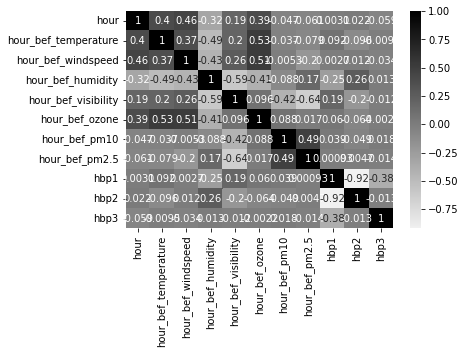

In [ ]:
# 1. X_features들의 서로 다른 축들 중에 서로의 상관관계가 높은 것을 찾는다.
# sns라이브러리를 통해 시각적으로 확인
# 색깔이 진할수록 상관관계가 높다.

cmap = sns.light_palette(color="black", as_cmap=True)
sns.heatmap(X_features.corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
# pandas내부의 corr()함수를 통해 수치적으로 정확히 확인

cor_matrix = abs(X_features.corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

hour  hour_bef_temperature  hour_bef_windspeed  \
hour                  0.000000              0.402386            0.459823   
hour_bef_temperature  0.402386              0.000000            0.370793   
hour_bef_windspeed    0.459823              0.370793            0.000000   
hour_bef_humidity     0.324711              0.486215            0.427852   
hour_bef_visibility   0.193399              0.200341            0.261902   
hour_bef_ozone        0.386720              0.525443            0.512580   
hour_bef_pm10         0.047382              0.037487            0.005339   
hour_bef_pm2.5        0.061229              0.078665            0.198391   
hbp1                  0.003116              0.092274            0.002724   
hbp2                  0.021609              0.095737            0.011543   
hbp3                  0.058964              0.009481            0.034203   

                      hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  \
hour                           0.324711             0.193399        0.386720   
hour_bef_temperature           0.486215             0.200341        0.525443   
hour_bef_windspeed             0.427852             0.261902        0.512580   
hour_bef_humidity              0.000000             0.594545        0.405196   
hour_bef_visibility            0.594545             0.000000        0.096312   
hour_bef_ozone                 0.405196             0.096312        0.000000   
hour_bef_pm10                  0.088137             0.419691        0.088233   
hour_bef_pm2.5                 0.167736             0.644989        0.017284   
hbp1                           0.249698             0.186625        0.060359   
hbp2                           0.264583             0.196813        0.064331   
hbp3                           0.012641             0.011659        0.002173   

                      hour_bef_pm10  hour_bef_pm2.5      hbp1      hbp2  \
hour                       0.047382        0.061229  0.003116  0.021609   
hour_bef_temperature       0.037487        0.078665  0.092274  0.095737   
hour_bef_windspeed         0.005339        0.198391  0.002724  0.011543   
hour_bef_humidity          0.088137        0.167736  0.249698  0.264583   
hour_bef_visibility        0.419691        0.644989  0.186625  0.196813   
hour_bef_ozone             0.088233        0.017284  0.060359  0.064331   
hour_bef_pm10              0.000000        0.489191  0.038516  0.049464   
hour_bef_pm2.5             0.489191        0.000000  0.000930  0.004742   
hbp1                       0.038516        0.000930  0.000000  0.920048   
hbp2                       0.049464        0.004742  0.920048  0.000000   
hbp3                       0.018476        0.013567  0.380097  0.012692   

                          hbp3  
hour                  0.058964  
hour_bef_temperature  0.009481  
hour_bef_windspeed    0.034203  
hour_bef_humidity     0.012641  
hour_bef_visibility   0.011659  
hour_bef_ozone        0.002173  
hour_bef_pm10         0.018476  
hour_bef_pm2.5        0.013567  
hbp1                  0.380097  
hbp2                  0.012692  
hbp3                  0.000000

In [ ]:
# 상관계수값이 높은 순대로 정렬

np.sort(cor_matrix.values.flatten())[::-1]

# corr(a,b) = corr(b,a)임으로 똑같은 값이 2개씩 나온다.

array([0.92004794, 0.92004794, 0.64498948, 0.64498948, 0.59454503,
       0.59454503, 0.5254433 , 0.5254433 , 0.51258025, 0.51258025,
       0.48919082, 0.48919082, 0.48621461, 0.48621461, 0.45982254,
       0.45982254, 0.42785228, 0.42785228, 0.4196908 , 0.4196908 ,
       0.40519649, 0.40519649, 0.40238566, 0.40238566, 0.38672037,
       0.38672037, 0.38009691, 0.38009691, 0.37079319, 0.37079319,
       0.32471089, 0.32471089, 0.26458267, 0.26458267, 0.26190158,
       0.26190158, 0.24969783, 0.24969783, 0.20034088, 0.20034088,
       0.19839124, 0.19839124, 0.19681324, 0.19681324, 0.1933993 ,
       0.1933993 , 0.18662483, 0.18662483, 0.16773596, 0.16773596,
       0.09631191, 0.09631191, 0.09573713, 0.09573713, 0.09227373,
       0.09227373, 0.08823347, 0.08823347, 0.08813721, 0.08813721,
       0.07866529, 0.07866529, 0.064331  , 0.064331  , 0.06122932,
       0.06122932, 0.06035891, 0.06035891, 0.05896394, 0.05896394,
       0.04946419, 0.04946419, 0.0473816 , 0.0473816 , 0.03851

In [ ]:
# 상관관수값이 가장 큰 두 축을 찾기

idx = np.where(cor_matrix == cor_matrix.max().max())[0]
print('columns of max corr : {} & {}'.format(cor_matrix.columns[idx[0]], cor_matrix.columns[idx[1]]))

columns of max corr : hbp1 & hbp2


여기서 확인해볼 점은 hbp1과 hbp2는 같은 범주형 축인 'hour_bef_precipitation'에서 나온 새 축이라는 것이다. 

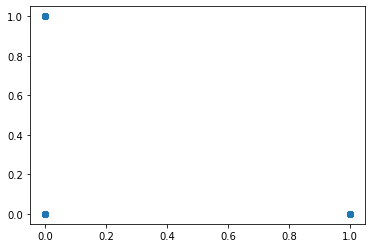

In [ ]:
# 실제 산점도를 그려보아도, 이 축들의 상관관계가 높은 것이 의미가 없음을 확인할 수 있다.

plt.scatter(bike.hbp1,bike.hbp2)

In [ ]:
# one-hot encoding과정에서 생긴 hbp1~hbp3는 제외하고 다시 진행

cor_matrix = abs(X_features.iloc[:,:-3].corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

hour  hour_bef_temperature  hour_bef_windspeed  \
hour                  0.000000              0.402386            0.459823   
hour_bef_temperature  0.402386              0.000000            0.370793   
hour_bef_windspeed    0.459823              0.370793            0.000000   
hour_bef_humidity     0.324711              0.486215            0.427852   
hour_bef_visibility   0.193399              0.200341            0.261902   
hour_bef_ozone        0.386720              0.525443            0.512580   
hour_bef_pm10         0.047382              0.037487            0.005339   
hour_bef_pm2.5        0.061229              0.078665            0.198391   

                      hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  \
hour                           0.324711             0.193399        0.386720   
hour_bef_temperature           0.486215             0.200341        0.525443   
hour_bef_windspeed             0.427852             0.261902        0.512580   
hour_bef_humidity              0.000000             0.594545        0.405196   
hour_bef_visibility            0.594545             0.000000        0.096312   
hour_bef_ozone                 0.405196             0.096312        0.000000   
hour_bef_pm10                  0.088137             0.419691        0.088233   
hour_bef_pm2.5                 0.167736             0.644989        0.017284   

                      hour_bef_pm10  hour_bef_pm2.5  
hour                       0.047382        0.061229  
hour_bef_temperature       0.037487        0.078665  
hour_bef_windspeed         0.005339        0.198391  
hour_bef_humidity          0.088137        0.167736  
hour_bef_visibility        0.419691        0.644989  
hour_bef_ozone             0.088233        0.017284  
hour_bef_pm10              0.000000        0.489191  
hour_bef_pm2.5             0.489191        0.000000

In [ ]:
# 상관계수값이 높은 순대로 정렬

np.sort(cor_matrix.values.flatten())[::-1]

# corr(a,b) = corr(b,a)임으로 똑같은 값이 2개씩 나온다.
# 가장 큰 값이 '0.64498948'정도이다.
# 이 값을 가진 두 축을 찾아 하나를 제거하도록 하자.

# 참고
# 사실 어떤 것을 제거할지는 개인의 판단에 맡긴다.
# 상관관계가 높은 두 축들을 찾아내어, 두 축에 대한 2차원 산점도를 그려보고 결정해도 된다.
# 왜냐하면, corr는 하나의 지표임으로 두 축과의 관계를 잘 나타내지 않을 수 있기 때문.

array([0.64498948, 0.64498948, 0.59454503, 0.59454503, 0.5254433 ,
       0.5254433 , 0.51258025, 0.51258025, 0.48919082, 0.48919082,
       0.48621461, 0.48621461, 0.45982254, 0.45982254, 0.42785228,
       0.42785228, 0.4196908 , 0.4196908 , 0.40519649, 0.40519649,
       0.40238566, 0.40238566, 0.38672037, 0.38672037, 0.37079319,
       0.37079319, 0.32471089, 0.32471089, 0.26190158, 0.26190158,
       0.20034088, 0.20034088, 0.19839124, 0.19839124, 0.1933993 ,
       0.1933993 , 0.16773596, 0.16773596, 0.09631191, 0.09631191,
       0.08823347, 0.08823347, 0.08813721, 0.08813721, 0.07866529,
       0.07866529, 0.06122932, 0.06122932, 0.0473816 , 0.0473816 ,
       0.03748724, 0.03748724, 0.01728425, 0.01728425, 0.00533882,
       0.00533882, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
# 상관관수값이 가장 큰 두 축을 찾기

idx = np.where(cor_matrix == cor_matrix.max().max())[0]
print('columns of max corr : {} & {}'.format(cor_matrix.columns[idx[0]], cor_matrix.columns[idx[1]]))

columns of max corr : hour_bef_visibility & hour_bef_pm2.5


In [ ]:
# 2. 서로 상관관계가 높은 것들 중 y_label과의 상관관계가 높은 것을 남겨두고, 낮은 것을 제거한다. 

# 'hour_bef_visibility' & 'hour_bef_pm2.5'

print('hour_bef_visibility :', X_features.loc[:,'hour_bef_visibility'].corr(y_label))
print('hour_bef_pm2.5 :', X_features.loc[:,'hour_bef_pm2.5'].corr(y_label))

hour_bef_visibility : 0.30660493443433273
hour_bef_pm2.5 : -0.13429258191572585


In [ ]:
# y_target과 상관계수값이 더 작은 'hour_bef_pm2.5'열을 제거한다.

X2_features = X_features.drop('hour_bef_pm2.5', axis=1)
X2_features.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hbp1', 'hbp2', 'hbp3'],
      dtype='object')

#### 2-1-2. VIF를 통해 다중공선성 위험이 제일 큰 변수 한개를 제거
* 위에서 변수를 제거한 이후 만들어진 X2_features을 사용한다.
* 변수 제거 후에는 X3_features로 새로 지정


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 값을 저장할 데이터프레임 변수
vif = pd.DataFrame()

# 첫번째 features축은 columns이름으로
vif["features"] = X2_features.columns # 독립변수들의 이름들로 구성된 features열 추가

# 두번째 축은 VIF값을 계산하여 집어넣기
vif["VIF Factor"] = [variance_inflation_factor(X2_features.values, i) for i in range(X2_features.shape[1])] # 리스트내포

vif

features  VIF Factor
0                  hour    1.408332
1  hour_bef_temperature    1.706727
2    hour_bef_windspeed    1.643662
3     hour_bef_humidity    2.869818
4   hour_bef_visibility    2.567377
5        hour_bef_ozone    1.740091
6         hour_bef_pm10    1.624140
7                  hbp1  125.665213
8                  hbp2    5.122999
9                  hbp3    1.688444

VIF란?
* 어떤 축이 다른 축으로 표현될 수 있느냐를 R^2으로 나타낸 점수이다.
* hbp1~hbp3의 경우, hp3는 9개의 1과 나머지는 모두 0으로 되어 있다.
* 따라서 hbp1과 hbp2 둘 중 하나는 1임으로 'hbp1+hbp2=1' 관계라고 볼 수 있다.
* 즉, hbp1 = 1-hbp2 로 표현될 수 있고, 이는 hbp1이 hbp2로 표현될 수 있다는 것을 의미한다.
* 따라서 hbp1이 제거되어야한다.

In [ ]:
X2_features.hbp1 == 1-X2_features.hbp2

0       True
1       True
2       True
3       True
4       True
        ... 
1337    True
1338    True
1339    True
1340    True
1341    True
Length: 1342, dtype: bool

In [ ]:
# 다중공선성의 제거를 위해 VIF값이 가장 큰 'hbp1'열을 제거
# VIF가 크다는 것은 그 열이 다른 열들로 표현이 잘 된다는 것을 의미한다.
# VIF값이 10을 넘으면, 제거를 하는 것이 좋다.

X3_features = X2_features.drop('hbp1', axis=1)
X3_features.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hbp2', 'hbp3'],
      dtype='object')

### 2-2. 통계적 검정으로 변수 제거
t-test를 통해 통계적으로 회귀계수가 0이라고 판단된 X변수를 제거한다.
> 참고로, t-test를 하기 위해서는 모델학습이 우선시되어야한다. 따라서 사실상 통계적 검정으로 변수를 제거하는 방법은 학습데이터로 모델학습을 한 뒤에 하는게 맞으나, 변수제거에서 한꺼번에 다루기 위해 여기서 다루었다.

상관계수행렬, VIF를 통해 다중공선성이 제거된 데이터(X3_features)로 statsmodel을 통해 summary 출력
* t-test로 0이라고 판단된 변수를 제거한 X4_features로 새로 지정

In [ ]:
# Linear Regression모델 적용 시, 통계적 정보를 주는 라이브러리(기초세션의 통계적사고에서 다룸)
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 상수항을 추가한 다중선형회귀
# 기초세션의 '통계적사고'에서 다룬 선형회귀 내용을 가져와 사용

X_constant = sm.add_constant(X3_features, has_constant='add') # has_constant='add'; 상수항 추가
lin_model_constant = sm.OLS(y_label, X_constant) # OLS기법 적용
lin_model_constant = lin_model_constant.fit() # 모델 학습
lin_model_constant.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.28e-251
Time:                        10:37:43   Log-Likelihood:                -7233.5
No. Observations:                1342   AIC:                         1.449e+04
Df Residuals:                    1332   BIC:                         1.454e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -25.0253     16.586     -1.509      0.132     -57.563       7.512
hour                     4.8544      0.256     18.976      0.000       4.353       5.356
hour_bef_temperature     5.2348      0.366     14.318      0.000       4.518       5.952
hour_bef_windspeed       4.9724      1.351      3.680      0.000       2.322       7.623
hour_bef_humidity       -0.3416      0.122     -2.794      0.005      -0.581      -0.102
hour_bef_visibility      0.0023      0.004      0.576      0.565      -0.006       0.010
hour_bef_ozone         287.5592     99.081      2.902      0.004      93.188     481.930
hour_bef_pm10           -0.3121      0.060     -5.240      0.000      -0.429      -0.195
hbp2                   -55.3162      9.013     -6.138      0.000     -72.997     -37.635
hbp3                    22.6694     20.225      1.121      0.263     -17.007      62.345
==============================================================================
Omnibus:                      182.681   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.748
Skew:                           0.914   Prob(JB):                     1.63e-64
Kurtosis:                       4.384   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 'hour_bef_visibility'열의 경우, p-value값이 0.106으로 0.05보다 큼으로
# 회귀계수가 0이라는 귀무가설(H0)을 기각하지 못한다.
# 따라서 'hour_bef_visibility'열의 회귀계수는 0임으로 해당 X변수의 제거가 필요하다.
X4_features = X3_features.drop('hour_bef_visibility', axis=1)
X4_features.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_ozone', 'hour_bef_pm10', 'hbp2', 'hbp3'],
      dtype='object')

In [ ]:
# 변수 제거 후에 새로 모델을 학습시켜보았더니, 모든 변수의 회귀계수가 0.05보다 작게 나온다.

X_constant = sm.add_constant(X4_features, has_constant='add') # has_constant='add'; 상수항 추가
lin_model_constant = sm.OLS(y_label, X_constant) # OLS기법 적용
lin_model_constant = lin_model_constant.fit() # 모델 학습
lin_model_constant.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     241.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          9.39e-253
Time:                        10:37:44   Log-Likelihood:                -7233.6
No. Observations:                1342   AIC:                         1.449e+04
Df Residuals:                    1333   BIC:                         1.453e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -17.4073     10.011     -1.739      0.082     -37.046       2.231
hour                     4.8571      0.256     18.995      0.000       4.356       5.359
hour_bef_temperature     5.2010      0.361     14.417      0.000       4.493       5.909
hour_bef_windspeed       5.0332      1.347      3.737      0.000       2.391       7.675
hour_bef_humidity       -0.3884      0.091     -4.251      0.000      -0.568      -0.209
hour_bef_ozone         279.3563     98.028      2.850      0.004      87.051     471.662
hour_bef_pm10           -0.3327      0.048     -6.990      0.000      -0.426      -0.239
hbp2                   -55.7558      8.978     -6.210      0.000     -73.369     -38.143
hbp3                    22.7962     20.219      1.127      0.260     -16.868      62.460
==============================================================================
Omnibus:                      182.473   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.956
Skew:                           0.913   Prob(JB):                     2.43e-64
Kurtosis:                       4.379   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 데이터 분할
* train_X, train_y : 모델 학습을 위한 데이터
* test_X, test_y : 학습된 모델을 평가하기 위한 데이터

학습, 테스트 데이터 8:2비율로 분할 
* random state=1 으로 지정

In [ ]:
from sklearn.model_selection import train_test_split

# X3_features 사용; X4_features의 경우, 학습이후에 만들어진 데이터임으로

train_X, test_X, train_y, test_y = train_test_split(X3_features, y_label, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1073, 9) (269, 9) (1073,) (269,)


## 회귀 평가함수; MSE(mean-square-error), MAE(mean-absolute-error)

여러가지 회귀모델을 비교하기 위한 평가함수이다.
* 각각의 회귀모델은 나름의 목적함수/손실함수를 가지고 있고 이값을 각각 최소화하는 방향으로 학습이 이루어진다.
* 따라서 서로 다른 모델의 경우, 서로 다른 '목적함수/손실함수'를 가짐으로써 어떤 모델이 더 좋은지 평가하기가 어렵다.
* 그렇기에 서로 다른 회귀 모델을 비교하기 위해 평가함수인 RMS/MAE를 사용한다.

In [ ]:
# 회귀(y값이 연속형변수)의 평가지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    # MSE는 제곱이기에 값이 큼으로 r-MSE(root)를 이용한다.
    # MSE는 scikit-learn의 mean_squared_error()로 계산
    rmse_val = np.sqrt(mean_squared_error(y,pred))
    # MAE는 scikit-learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)

    # (r-MSE & MAE)를 출력 후, 반환해주는 함수
    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))
    return (rmse_val, mae_val)

## 1. LinearRegression

* 사용한 모델 : 규체항이나 다항회귀 없이, 그냥 쌩 다중선형회귀
* 학습방법 : 학습데이터로 학습 후, 테스트데이터로 평가

RMSE: 53.242, MAE: 38.685


<BarContainer object of 2 artists>

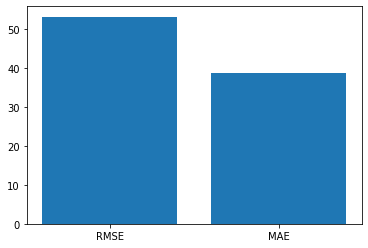

In [ ]:
from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
pred = lr_model.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

## 2.  Ridge, Lasso

* 사용한 모델
> * Ridge : 회귀계수의 크기를 0으로 가깝게 하여, X를 완전히 제거하지 않고 살려두기 위한 모델
> * Lasso : 회귀계수의 크기를 그냥 0으로 만들어버려, X를 완전히 제거하는 모델

* 학습방법
> * 모델을 하이퍼라미터 값을 변경해가면서 10-Fold를 통해 학습데이터 평가. 즉, 학습데이터를 학습과 검증데이터로 쪼개는 과정을 반복하여 학습시키는 방법
>   * 참고 : https://huidea.tistory.com/30
> * 하이퍼라미터 후보 : alpha = [0.001, 0.01, 0.1, 1, 10]
>   * 하이퍼파라미터 선택을 위한 평가지표 : R2_score
>   * 참고 : R2_score의 경우, 선형회귀에서만 사용할 수 있는 지표이다. 즉, 다른 회귀모델에서는 사용불가.

* summary
> * 그냥 학습
>   * 학습에 사용하는 데이터 = train_X, train_y
>   * 테스트에 사용하는 데이터 = test_X, test_y
> * k-fold 학습
>   * 학습에 사용하는 데이터 = train_X, train_y
>   * 테스트에 사용하는 데이터 = train_X, train_y
> * k-fold를 사용하는 이유
>   * 데이터의 수가 너무 적어, test_X, test_y를 만들기 어려운 경우
>   * 하이퍼파라미터를 찾을 시에, test_X, test_y을 잘 예측하는 모델이 아닌 train_X, train_y을 잘 예측하는 모델로 하여, 과적합을 막기 위함

In [ ]:
# 데이터 전처리에 사용되는 라이브러리
from sklearn.model_selection import cross_val_score

# 규제항이 있는 선형회귀 관련 라이브러리
from sklearn.linear_model import Ridge, Lasso

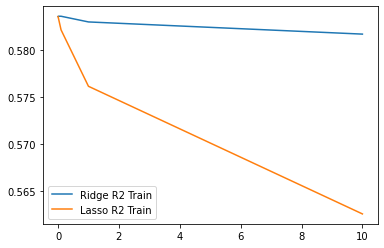

In [ ]:
# hyper-parameter 후보
alpha_list = [0.001, 0.01, 0.1, 1, 10]


# 모델 평가와 관련된 라이브러리
from sklearn import metrics
from sklearn.metrics import r2_score # R^2

# 각 모델을 비교하기 위한 평가지표인 r2-score를 저장할 장소
ridge_r2_list_train = []
ridge_r2_list_test = []
lasso_r2_list_train = []
lasso_r2_list_test = []

# 모든 'hyper-parameter'에 대해 하나씩 수행
for alpha in alpha_list:

    # 모델 객체 선언; Ridge(), Lasso()
    # alpha <- hyper-parameter 하나씩 대입
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    


    # # 이전처럼 'k-fold학습'을 쓰지 않고, 그냥 학습
    # ridge_model.fit(train_X,train_y)
    # lasso_model.fit(train_X,train_y)
    # #테스트; sklearn.metrics에 있는 r2_score()함수를 가져와 평가
    # ridge_r2_list_test.append(r2_score(test_y,ridge_model.predict(test_X)))
    # lasso_r2_list_test.append(r2_score(test_y,lasso_model.predict(test_X)))


    # kfold 통해 성능평가; 즉, train_set을 8:2로 나누는 것을 10번 반복해서 학습을 진행하는 것이다.
    # cross_val_score()에서 scoring='r2'로 두고 평가
    # 즉, train_set만을 가지고 학습 및 평가(검증)를 진행한다.
    # test_set은 사용하지 않는다.
    ridge_r2_list_train.append(np.mean(cross_val_score(ridge_model,train_X,train_y,scoring='r2',cv=10)))
    lasso_r2_list_train.append(np.mean(cross_val_score(lasso_model,train_X,train_y,scoring='r2',cv=10)))
    
    

plt.plot(alpha_list, ridge_r2_list_train, label='Ridge R2 Train')
plt.plot(alpha_list, lasso_r2_list_train, label='Lasso R2 Train')

plt.legend()

# r2지표는 높을수록 좋음으로, Ridge&Lasso 모두 alpha=0.001일 때 가장 모델의 성능이 좋다.

In [ ]:
# 차례로 'alpha = [0.001, 0.01, 0.1, 1, 10]'을 했을 때, Ridge모델에 대한 r2평가지표
ridge_r2_list_train

[0.5835370814408894,
 0.5835598975702994,
 0.5835645621850609,
 0.5829591161172232,
 0.5816632964853079]

In [ ]:
# 차례로 'alpha = [0.001, 0.01, 0.1, 1, 10]'을 했을 때, Lasso모델에 대한 r2평가지표
lasso_r2_list_train

[0.5835280784514637,
 0.5834113719012438,
 0.5821142608318493,
 0.576112418978648,
 0.5625329424414238]

가장 좋은 성능이 나온 hyper-parameter값을 기준으로 모델을 제작한다.
* 이전에는 반복문을 사용하여 가장 마지막 모델이 변수안에 들어갔기에, 다시 학습이 필요함

In [ ]:
# 가장 성능이 좋은 모델의 hyper-parameter 확인

idx1 = np.array(ridge_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index
idx2 = np.array(lasso_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index

print('Ridge best alpha :', alpha_list[idx1])
print('Lasso best alpha :', alpha_list[idx2])

Ridge best alpha : 0.1
Lasso best alpha : 0.001


각각 최적이 hyper-parameter로 학습한 후에 Ridge와 Lasso의 성능을 서로 비교하자.
* 이번에는 R2_score뿐만 아니라, 일반적으로 회귀모델들의 평가지표로써 사용되는 r-MSE & MAE도 함께 사용

In [ ]:
# 각각 alpha = 0.1, 0.001으로 두고, ridge와 lasso 적합

# 모델 객체 선언, 이 때 위에서 구한 최적의 hyper-parameter를 넣어준다.
ridge = Ridge(alpha=0.1) # 'fit_intercept=True' : 절편을 넣어줄지에 대한 여부
lasso = Lasso(alpha=0.001)

# 모델 학습; 이번에는 학습데이터를 학습&검증데이터로 나누는 것이 아닌
# 학습데이터로 학습하고, 테스트데이터로 테스트를 한다.
ridge.fit(train_X, train_y)
lasso.fit(train_X, train_y)

# 모델 평가
# R^2; r2_score
# 여기서 매우 조심해야할 사항이 있다.
# 그것은 바로 r2_score()와 mean_squared_error() 모두 인자의 순서를 주의해서 넣어주어야한다는 것이다.
# 모두 (정닶값,예측값) 순으로 넣어주어야한다.
# mse는 어차피 같은 값이 나오지만, r2_score는 조심해야한다.
print("R square score for Ridge model : {:.5f}".format(r2_score(test_y, ridge.predict(test_X))))
print("R square score for Lasso model : {:.5f}".format(r2_score(test_y, lasso.predict(test_X))))

# MSE; mean_squared_error
print("MSE for Ridge model : {:.5f}".format(mean_squared_error(test_y, ridge.predict(test_X))))
print("MSE for Lasso model : {:.5f}".format(mean_squared_error(test_y, lasso.predict(test_X))))

R square score for Ridge model : 0.55624
R square score for Lasso model : 0.55745
MSE for Ridge model : 2842.77187
MSE for Lasso model : 2835.00559


RMSE: 53.318, MAE: 38.730


<BarContainer object of 2 artists>

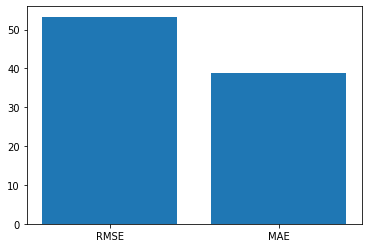

In [ ]:
pred = ridge.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

RMSE: 53.245, MAE: 38.686


<BarContainer object of 2 artists>

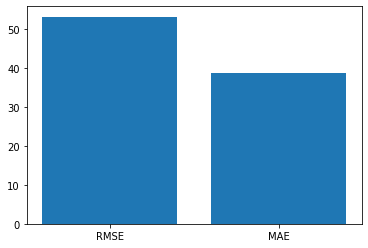

In [ ]:
pred = lasso.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

Lasso가 Ridge보다 근소한 차이로 R2_score값은 높고 RMSE값은 낮기에 더 좋은 모델이다. 따라서 해당 Lasso 모델을 선택한다.

## 변수중요도 : 회귀계수에 대한 해석

ML에서는 NN과 달리 어느 정도 설명가능한 부분이 있다. 그 중 하나가 바로 변수 중요도이다.

> 일반적으로 회귀계수의 크기가 클수록 해당 X변수의 중요도가 높다. 하지만 회귀계수의 의미를 생각하면, X변수를 스케일링에 따라 다르게 해석할 수 있다.(세션자료 참고)

> 1. 스케일링 없이
>    * 1000원짜리 김밥 1원 증가할 때와 10억원짜리 집값 1원 증가할 때, 경제지표에 미치는 영향
> 2. min-max scaling
>    * 1000원짜리 김밥가격 10% 증가할 때와 10억원짜리 집값 10% 증가할 때, 경제지표에 미치는 영향
> 3. standard scaling
>    * 데이터로 얻은 각각의 김밥과 집값의 분포에서 z-score가 일정부분 동일하게 움직였을 때의 가격 변화가 경제지표에 미치는 영향

최종적으로 선택해서 학습까지 완료시킨 ridge모델을 사용

1. 스케일링 없이

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


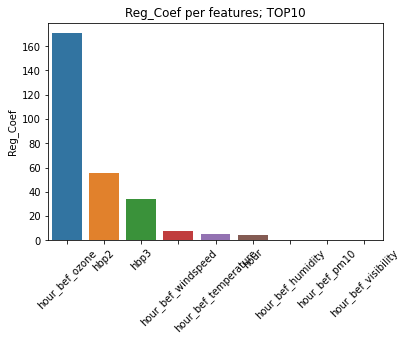

In [ ]:
# 표준화한 회귀계수의 절댓값
coef = ridge.coef_
coef_abs = np.abs(coef)

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = X3_features.head(1).columns[idx].values

# top10
sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features; TOP10')
plt.show()

2. min-max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

total_data = pd.concat([X3_features, y_label], axis=1)

scaler = MinMaxScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(1) # 0~1 사이의 값들을 가짐을 확인할 수 있다.

hour  hour_bef_temperature  hour_bef_windspeed  hour_bef_humidity  \
0  0.869565              0.490706              0.1875           0.891304   

   hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  hbp2  hbp3     count  
0             0.259105        0.196721       0.257692   1.0   0.0  0.111628

이후, 이전처럼 '데이터분할 -> 최적의 hyper-parameter선택 -> 선택된 모델로 학습 -> 변수중요도 확인' 과정을 수행

3. standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

total_data = pd.concat([X3_features, y_label], axis=1)

scaler = StandardScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(1) # 0~1 사이의 값들을 가짐을 확인할 수 있다.

hour  hour_bef_temperature  hour_bef_windspeed  hour_bef_humidity  \
0  1.198579             -0.114422           -0.720969           1.855885   

   hour_bef_visibility  hour_bef_ozone  hour_bef_pm10      hbp2      hbp3  \
0            -1.459377       -0.628003       0.599678  5.705261 -0.072412   

      count  
0 -0.749088

In [ ]:
ridge.coef_

array([ 4.71283875e+00,  5.06427769e+00,  7.66071621e+00, -4.79688026e-01,
       -1.31462007e-03,  1.70677857e+02, -3.66791635e-01, -5.58750343e+01,
        3.41595346e+01])

# 문제 1

사용할 데이터 : house.csv

네이버 부동산에서 크롤링해 가져온 서울시 부동산 데이터

* Unnamed: 0 : 의미없는 칼럼
* id : 매물id
> 한 매물당 하나의 id가 할당된다.
* lat : 위도
* lng : 경도
* gu : 구(행정지역정보)
* goodsType : 매물의 거래형태(아파트,빌라 등)
* payType : 판매의 거래형태(월세,매매 등)
* floor : 매물방의 층수
* floor_total : 매물이 있는 전체 건물의 층수
* contractArea : 계약면적
* realArea : 실제면적
* direction : 창문방향(남향,북향)
* tag : 매물마다 관련된 설명정보
> ex. 일조량 및 관리 잘 된 복층
* tagList : 매물마다 관련된 설명에서의 태그
> ex. '10년이내, 25년이내 건축, 복층'과 같이 인스타 해시테그 느낌
* deposit : 보증금
* monthlyPay : 월세


> 데이터 출처 : 네이버 부동산 크롤링 데이터

설명
* X와 y를 찾아, LinearRegression을 위 예제1을 참고하여 실행하시오.
* 예를 들면, y='보증금', X=나머지 으로 하여 나머지 값으로 보증금을 예측하는 선형회귀문제로 Task를 정해 코딩을 진행

* 조건
> * ***(핵심내용)*** X & y로 이용할 것을 명확히 제시하고, y에 따른 어떤 문제인지 파악하기
>    * y를 연속형으로 하여, LinearRegression문제가 될 수 있도록 한다.
> * X변수에 1개이상의 범주형데이터를 포함하고, one-hot encoding을 사용하기
> * 최소 1가지 이상의 방법으로 X데이터 중 1개 이상의 열을 삭제하기
> * 데이터 분할 진행하기
> * ***(핵심내용)*** 다중선형회귀 모델을 사용하기
> * 규제항이 있는 모델(Ridge,Lasso)을 사용하기
> * hyper-parameter 튜닝을 진행하기
>   * cross_val_score를 사용하지 않아도 됩니다.
>   * GridSearchCV ,RandomSearchCV을 사용하셔도 됩니다.
>   * 참고자료 : https://dacon.io/codeshare/
> * ***(핵심내용)*** 변수 중요도 해석
>   * 스케일링 없이
>   * min-max scaling
>   * standard scaling

# 문제 1 풀이 (1차)

In [ ]:
path = '/content/drive/MyDrive/DSL/DSL 정규세션/[0131] LinearRegression_and_SVM/data/house.csv'
house = pd.read_csv(path)
house

Unnamed: 0          id        lat         lng       gu goodsType  \
0               0  2233636969  37.677967  127.041725   dobong       아파트   
1               3  2232935032  37.657623  127.044115   dobong       아파트   
2               4  2232502309  37.645001  127.040034   dobong        빌라   
3               5  2232883418  37.666850  127.039420   dobong       아파트   
4               6  2234171117  37.655622  127.041475   dobong       사무실   
...           ...         ...        ...         ...      ...       ...   
93990      104994  2233562154  37.503072  127.026543  gangnam       사무실   
93991      104995  2232902002  37.470845  127.088900  gangnam       아파트   
93992      104996  2234189106  37.520802  127.024247  gangnam    단독/다가구   
93993      104998  2233833725  37.519625  127.038073  gangnam       아파트   
93994      104999  2234037357  37.529270  127.028672  gangnam       아파트   

      payType  floor  floor_total  contractArea  realArea direction  \
0          매매      5            5            81        63        남향   
1          매매     15           24           154       119        남향   
2          전세      3            4            38        33        남향   
3          매매      5           18           107        84        남향   
4          월세      2            8            30        22        북향   
...       ...    ...          ...           ...       ...       ...   
93990      월세      5            6           148        90        남향   
93991      전세      3           18            85        59        남향   
93992      전세      4            5           105        79       남동향   
93993      매매      8           12            83        59        북향   
93994      월세      7           14           212       196        남향   

                                     tag                             tagList  \
0                    ok. 일조량 및 관리 잘 된 복층        ['10년이내', '역세권', '복층', '탑층']   
1                     기본 로얄동 로얄층 채광 GOOD   ['25년이내', '대단지', '대형평수', '방네개이상']   
2      올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분  ['25년이상', '융자금적은', '올수리', '화장실한개']   
3         내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주   ['25년이상', '방세개', '화장실두개', '주차가능']   
4           빠른입주가능  상태깨끗  창동역도보7분  사무실강추    ['25년이내', '융자금없는', '주차가능', '북향']   
...                                  ...                                 ...   
93990           신논현역.신축. 첫 입주.층고3.8m.통창뷰            ['2년이내', '융자금없는', '역세권']   
93991             남향. 초입. 막히지 않은 탁트인 슢뷰.             ['10년이내', '대단지', '방세개']   
93992             리모델링완료 애완동물협의가능 금액조절가능           ['25년이내', '융자금없는', '방세개']   
93993               로얄층,올수리, 뷰가 정말 예쁩니다.             ['25년이상', '올수리', '방세개']   
93994                  깨끗 오래거주가능 공실 추가수리    ['25년이상', '융자금없는', '역세권', '대단지']   

       deposit  monthlyPay  
0        63000           0  
1       140000           0  
2        15000           0  
3        60000           0  
4          700          44  
...        ...         ...  
93990     7000         700  
93991    58000           0  
93992    55000           0  
93993   140000           0  
93994    20000         700  

[93995 rows x 16 columns]

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93995 entries, 0 to 93994
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    93995 non-null  int64  
 1   id            93995 non-null  int64  
 2   lat           93995 non-null  float64
 3   lng           93995 non-null  float64
 4   gu            93995 non-null  object 
 5   goodsType     93995 non-null  object 
 6   payType       93995 non-null  object 
 7   floor         93995 non-null  int64  
 8   floor_total   93995 non-null  int64  
 9   contractArea  93995 non-null  int64  
 10  realArea      93995 non-null  int64  
 11  direction     90791 non-null  object 
 12  tag           89466 non-null  object 
 13  tagList       93995 non-null  object 
 14  deposit       93995 non-null  int64  
 15  monthlyPay    93995 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 11.5+ MB


## one-hot encoding

In [ ]:
house['intercept'] = 1
house_1 = house.join(pd.get_dummies(house.gu))
house_2 = house_1.join(pd.get_dummies(house.goodsType))
house_3 = house_2.join(pd.get_dummies(house.payType))
house_4 = house_3.join(pd.get_dummies(house.direction))

In [ ]:
house_5 = house_4.drop(['Unnamed: 0'],axis = 1)
house_6 = house_5.drop(['id'],axis = 1)
house_7 = house_6.drop(['gu'],axis = 1)
house_8 = house_7.drop(['goodsType'],axis = 1)
house_9 = house_8.drop(['payType'],axis = 1)
house_10 = house_9.drop(['direction'],axis = 1)
house_11 = house_10.drop(['tag'],axis = 1)
house_12 = house_11.drop(['tagList'],axis = 1)

## 독립변수 간 상관성

In [ ]:
house_12.corr()['deposit']

lat            -0.072476
lng             0.050504
floor           0.307313
floor_total     0.373955
contractArea    0.008103
                  ...   
동향             -0.055307
북동향            -0.058843
북서향            -0.056720
북향             -0.096221
서향             -0.086962
Name: deposit, Length: 61, dtype: float64

In [ ]:
raw_X = house_12.drop(['deposit'], axis = 1)
raw_X

lat         lng  floor  floor_total  contractArea  realArea  \
0      37.677967  127.041725      5            5            81        63   
1      37.657623  127.044115     15           24           154       119   
2      37.645001  127.040034      3            4            38        33   
3      37.666850  127.039420      5           18           107        84   
4      37.655622  127.041475      2            8            30        22   
...          ...         ...    ...          ...           ...       ...   
93990  37.503072  127.026543      5            6           148        90   
93991  37.470845  127.088900      3           18            85        59   
93992  37.520802  127.024247      4            5           105        79   
93993  37.519625  127.038073      8           12            83        59   
93994  37.529270  127.028672      7           14           212       196   

       monthlyPay  intercept  dobong  dongdaemun  ...  월세  전세  남동향  남서향  남향  \
0               0          1       1           0  ...   0   0    0    0   1   
1               0          1       1           0  ...   0   0    0    0   1   
2               0          1       1           0  ...   0   1    0    0   1   
3               0          1       1           0  ...   0   0    0    0   1   
4              44          1       1           0  ...   1   0    0    0   0   
...           ...        ...     ...         ...  ...  ..  ..  ...  ...  ..   
93990         700          1       0           0  ...   1   0    0    0   1   
93991           0          1       0           0  ...   0   1    0    0   1   
93992           0          1       0           0  ...   0   1    1    0   0   
93993           0          1       0           0  ...   0   0    0    0   0   
93994         700          1       0           0  ...   1   0    0    0   1   

       동향  북동향  북서향  북향  서향  
0       0    0    0   0   0  
1       0    0    0   0   0  
2       0    0    0   0   0  
3       0    0    0   0   0  
4       0    0    0   1   0  
...    ..  ...  ...  ..  ..  
93990   0    0    0   0   0  
93991   0    0    0   0   0  
93992   0    0    0   0   0  
93993   0    0    0   1   0  
93994   0    0    0   0   0  

[93995 rows x 60 columns]

In [ ]:
raw_X.columns

Index(['lat', 'lng', 'floor', 'floor_total', 'contractArea', 'realArea',
       'monthlyPay', 'intercept', 'dobong', 'dongdaemun', 'dongjak',
       'eunpyeong', 'gangbuk', 'gangdong', 'gangnam', 'gangseo', 'guemcheon',
       'guro', 'gwanak', 'gwangjin', 'jongno', 'jung', 'jungnang', 'mapo',
       'nowon', 'seocho', 'seodaemun', 'seongbuk', 'seongdong', 'songpa',
       'yangcheon', 'yeongdeungpo', 'yongsan', '단독/다가구', '빌라', '사무실', '상가',
       '상가주택', '아파트', '아파트분양권', '오피스텔', '오피스텔분양권', '원룸', '재개발', '재건축', '전원주택',
       '지식산업센터', '한옥주택', '단기임대', '매매', '월세', '전세', '남동향', '남서향', '남향', '동향',
       '북동향', '북서향', '북향', '서향'],
      dtype='object')

In [ ]:
raw_y = house_12['deposit']
raw_y

0         63000
1        140000
2         15000
3         60000
4           700
          ...  
93990      7000
93991     58000
93992     55000
93993    140000
93994     20000
Name: deposit, Length: 93995, dtype: int64

## VIF를 통한 다중공선성 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() 
vif["features"] = raw_X.columns 
vif["VIF Factor"] = [variance_inflation_factor(raw_X.values, i) for i in range(raw_X.shape[1])] 
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features  VIF Factor
0            lat   22.087112
1            lng   30.015478
2          floor    1.890951
3    floor_total    2.427441
4   contractArea    1.002236
5       realArea    1.138052
6     monthlyPay    1.001130
7      intercept    0.000000
8         dobong         inf
9     dongdaemun         inf
10       dongjak         inf
11     eunpyeong         inf
12       gangbuk         inf
13      gangdong         inf
14       gangnam         inf
15       gangseo         inf
16     guemcheon         inf
17          guro         inf
18        gwanak         inf
19      gwangjin         inf
20        jongno         inf
21          jung         inf
22      jungnang         inf
23          mapo         inf
24         nowon         inf
25        seocho         inf
26     seodaemun         inf
27      seongbuk         inf
28     seongdong         inf
29        songpa         inf
30     yangcheon         inf
31  yeongdeungpo         inf
32       yongsan         inf
33        단독/다가구         inf
34            빌라         inf
35           사무실         inf
36            상가         inf
37          상가주택         inf
38           아파트         inf
39        아파트분양권         inf
40          오피스텔         inf
41       오피스텔분양권         inf
42            원룸         inf
43           재개발         inf
44           재건축         inf
45          전원주택         inf
46        지식산업센터         inf
47          한옥주택         inf
48          단기임대         inf
49            매매         inf
50            월세         inf
51            전세         inf
52           남동향    9.862377
53           남서향    8.420715
54            남향   14.074363
55            동향    8.244711
56           북동향    3.230510
57           북서향    2.854877
58            북향    3.991707
59            서향    5.139075

In [ ]:
house_13 = house.join(pd.get_dummies(house.direction))
house_13 = house_13.drop(['Unnamed: 0'],axis = 1)
house_13 = house_13.drop(['id'],axis = 1)
house_13 = house_13.drop(['gu'],axis = 1)
house_13 = house_13.drop(['goodsType'],axis = 1)
house_13 = house_13.drop(['payType'],axis = 1)
house_13 = house_13.drop(['direction'],axis = 1)
house_13 = house_13.drop(['tag'],axis = 1)
house_13 = house_13.drop(['tagList'],axis = 1)

In [ ]:
X = house_13.drop(['deposit'], axis = 1)
X

lat         lng  floor  floor_total  contractArea  realArea  \
0      37.677967  127.041725      5            5            81        63   
1      37.657623  127.044115     15           24           154       119   
2      37.645001  127.040034      3            4            38        33   
3      37.666850  127.039420      5           18           107        84   
4      37.655622  127.041475      2            8            30        22   
...          ...         ...    ...          ...           ...       ...   
93990  37.503072  127.026543      5            6           148        90   
93991  37.470845  127.088900      3           18            85        59   
93992  37.520802  127.024247      4            5           105        79   
93993  37.519625  127.038073      8           12            83        59   
93994  37.529270  127.028672      7           14           212       196   

       monthlyPay  intercept  남동향  남서향  남향  동향  북동향  북서향  북향  서향  
0               0          1    0    0   1   0    0    0   0   0  
1               0          1    0    0   1   0    0    0   0   0  
2               0          1    0    0   1   0    0    0   0   0  
3               0          1    0    0   1   0    0    0   0   0  
4              44          1    0    0   0   0    0    0   1   0  
...           ...        ...  ...  ...  ..  ..  ...  ...  ..  ..  
93990         700          1    0    0   1   0    0    0   0   0  
93991           0          1    0    0   1   0    0    0   0   0  
93992           0          1    1    0   0   0    0    0   0   0  
93993           0          1    0    0   0   0    0    0   1   0  
93994         700          1    0    0   1   0    0    0   0   0  

[93995 rows x 16 columns]

In [ ]:
X.columns

Index(['lat', 'lng', 'floor', 'floor_total', 'contractArea', 'realArea',
       'monthlyPay', 'intercept', '남동향', '남서향', '남향', '동향', '북동향', '북서향', '북향',
       '서향'],
      dtype='object')

In [ ]:
raw_y = house_13['deposit']
raw_y

0         63000
1        140000
2         15000
3         60000
4           700
          ...  
93990      7000
93991     58000
93992     55000
93993    140000
93994     20000
Name: deposit, Length: 93995, dtype: int64

In [ ]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

features    VIF Factor
0            lat  1.105273e+00
1            lng  1.095919e+00
2          floor  1.768803e+00
3    floor_total  1.787148e+00
4   contractArea  1.001760e+00
5       realArea  1.017373e+00
6     monthlyPay  1.000746e+00
7      intercept  2.353982e+06
8            남동향  5.103016e+00
9            남서향  4.444539e+00
10            남향  7.080003e+00
11            동향  4.446895e+00
12           북동향  2.073223e+00
13           북서향  1.895887e+00
14            북향  2.463987e+00
15            서향  3.001744e+00

## 훈련 세트와 테스트 세트로 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(X, raw_y, 
                                                    train_size=0.7, 
                                                    test_size=0.3,
                                                    random_state=1) 

In [ ]:
train_X[:5]

lat         lng  floor  floor_total  contractArea  realArea  \
354    37.654164  127.046483     11           17            80        59   
31506  37.477082  126.816579     10           11           111        76   
70423  37.608041  127.003901      3            7           296       296   
86992  37.539552  126.970218     29           37           116        84   
3465   37.654819  127.040111      1            4            31        31   

       monthlyPay  intercept  남동향  남서향  남향  동향  북동향  북서향  북향  서향  
354             0          1    0    0   1   0    0    0   0   0  
31506         130          1    0    0   0   0    0    0   0   0  
70423         400          1    0    0   1   0    0    0   0   0  
86992           0          1    0    0   1   0    0    0   0   0  
3465            0          1    0    0   1   0    0    0   0   0

In [ ]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(65796, 16) (28199, 16) (65796,) (28199,)


## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler = scaler.fit(train_X) 

train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X) 
print(test_X_scaled[:5])

[[ 3.54288951e-01  2.82009490e-01 -6.88702348e-01 -6.31761002e-01
  -2.33930853e-02 -4.88950433e-01 -8.22606265e-03  0.00000000e+00
  -4.59127952e-01 -4.04225756e-01  1.48451290e+00 -4.02442872e-01
  -2.00959087e-01 -1.83883347e-01 -2.38706588e-01 -2.84069993e-01]
 [ 1.30926734e+00 -8.59848154e-01 -8.61759714e-01 -1.07139101e+00
  -2.12254084e-02 -4.05277023e-01 -7.62597096e-03  0.00000000e+00
  -4.59127952e-01 -4.04225756e-01 -6.73621631e-01 -4.02442872e-01
   4.97613726e+00 -1.83883347e-01 -2.38706588e-01 -2.84069993e-01]
 [-1.17902145e+00  1.07471310e-01 -5.15644983e-01 -6.31761002e-01
   1.02059065e-02  8.07987419e-01 -1.82508462e-03  0.00000000e+00
  -4.59127952e-01 -4.04225756e-01  1.48451290e+00 -4.02442872e-01
  -2.00959087e-01 -1.83883347e-01 -2.38706588e-01 -2.84069993e-01]
 [ 1.76260574e+00  5.80484296e-01 -6.88702348e-01 -6.31761002e-01
  -1.30966200e-02 -1.61229578e-01 -8.82615434e-03  0.00000000e+00
  -4.59127952e-01  2.47386513e+00 -6.73621631e-01 -4.02442872e-01
  -2.00

In [ ]:
print(type(train_X))
print(type(train_X_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


## Linear Regression model 만들기

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(train_X_scaled, train_y) 

In [ ]:
print(linear_model.coef_) 
print(linear_model.intercept_)

[-5.38502292e+03  4.55567334e+03  7.15708426e+03  1.84231726e+04
  1.93769165e+02  1.00306555e+04 -3.69218893e+02  4.26325641e-13
  1.16376926e+04  1.04193301e+04  1.69042643e+04  6.51873618e+03
  2.42116703e+03  1.66514530e+03  5.72192147e+02  2.53846929e+03]
50028.0061401927


In [ ]:
linear_beta = linear_model.coef_
linear_intercept = linear_model.intercept_

for i in range(len(linear_beta)):
  print(f"{train_X.columns[i]} : {linear_beta[i]: .2f}")
print(f"Intercept(Beta0) :{linear_intercept: .2f}")

lat : -5385.02
lng :  4555.67
floor :  7157.08
floor_total :  18423.17
contractArea :  193.77
realArea :  10030.66
monthlyPay : -369.22
intercept :  0.00
남동향 :  11637.69
남서향 :  10419.33
남향 :  16904.26
동향 :  6518.74
북동향 :  2421.17
북서향 :  1665.15
북향 :  572.19
서향 :  2538.47
Intercept(Beta0) : 50028.01


In [ ]:
linear_model.predict(train_X_scaled)[:15]

array([ 69262.59525143,  26268.37119443,  58097.41909259, 141384.3516013 ,
        28184.27109528,  11353.22068245,  44192.77370055, 104012.87841861,
        17143.52237241,  43755.32522358,  70198.58002472,  46341.46595498,
        38153.55990545,  43080.68021618,  40033.0504014 ])

## 성능평가 MSE, R2

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(train_y, linear_model.predict(train_X_scaled))

0.1981907215466885

In [ ]:
mean_squared_error(train_y, linear_model.predict(train_X_scaled))

3885904152.6769276

## Ridge and Lasso

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(raw_X, raw_y, train_size=0.7, test_size=0.3, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(65796, 60) (28199, 60) (65796,) (28199,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler() 
scaler2 = scaler.fit(train_X) 

train_X_scaled = scaler2.transform(train_X) 
test_X_scaled = scaler2.transform(test_X) 
print(test_X_scaled[:5])

[[ 3.54288951e-01  2.82009490e-01 -6.88702348e-01 -6.31761002e-01
  -2.33930853e-02 -4.88950433e-01 -8.22606265e-03  0.00000000e+00
  -2.05660788e-01 -2.02102406e-01 -2.03523933e-01 -2.04735773e-01
  -1.92541070e-01 -2.02956328e-01 -2.02428067e-01 -2.12588525e-01
  -2.08613601e-01 -2.12666614e-01 -2.01490594e-01 -2.02915734e-01
   5.36018527e+00 -2.03564426e-01 -2.03159198e-01 -2.03078070e-01
  -2.07779203e-01 -2.10037568e-01 -2.00426389e-01 -2.02102406e-01
  -2.01857869e-01 -2.08494572e-01 -2.09326592e-01 -2.10274116e-01
  -2.02590733e-01 -2.02672024e-01 -4.79383759e-01 -3.57629980e-01
   2.42078116e+00 -7.20716936e-02 -7.64794818e-01 -6.93581699e-02
  -2.42313074e-01 -4.03594801e-02 -2.43365862e-01 -2.40390610e-02
  -7.66190739e-02 -3.89855400e-03 -1.27838950e-01  0.00000000e+00
  -6.21293919e-02 -6.98178409e-01  1.21776912e+00 -6.01532450e-01
  -4.59127952e-01 -4.04225756e-01  1.48451290e+00 -4.02442872e-01
  -2.00959087e-01 -1.83883347e-01 -2.38706588e-01 -2.84069993e-01]
 [ 1.3092

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0).fit(train_X_scaled, train_y) 
lasso = Lasso(alpha=1.0).fit(train_X_scaled, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.946e+12, tolerance: 3.189e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(ridge.coef_)
print(ridge.intercept_)

[  1914.62825356  14766.59124484   3229.31821387   7193.06842204
     82.14213874  13535.30768885    -38.73997072      0.
  -7342.94355301  -4027.51012627   2039.89318085   -571.43951165
  -4768.33338321  -5463.73257782   4732.76878134   4025.8094342
   1286.72802732   1436.22699548    484.01261915  -2101.74650291
    631.62888626   -618.27910271  -6213.71824947   3135.72045263
  -8632.11191375  10179.12599317    274.50164251  -4656.12190847
    495.2810336   -1843.46663283   4529.14108328   2899.397133
   9418.54330415   -138.32338419  -4675.276462    -5361.80123818
    314.83991653    -43.91809235   9996.93128689   1260.53676948
  -7294.02005041  -1088.34416012   -480.95476262    653.56127604
   3669.14410977     87.05755526    467.14062909      0.
  -3092.74832888  19371.99348834 -17381.99879079   -852.10421131
   1474.04737494   1406.67530122   3686.99507679   -613.77689745
    302.69146961    196.72474198    -34.43166221   -445.55564034]
50028.00614019301


In [ ]:
ridge_beta = ridge.coef_
ridge_intercept = ridge.intercept_

for i in range(len(ridge_beta)):
  print(f"{train_X.columns[i]} : {ridge_beta[i]: .2f}")
print(f"Intercept(Beta0) :{ridge_intercept: .2f}")

lat :  1914.63
lng :  14766.59
floor :  3229.32
floor_total :  7193.07
contractArea :  82.14
realArea :  13535.31
monthlyPay : -38.74
intercept :  0.00
dobong : -7342.94
dongdaemun : -4027.51
dongjak :  2039.89
eunpyeong : -571.44
gangbuk : -4768.33
gangdong : -5463.73
gangnam :  4732.77
gangseo :  4025.81
guemcheon :  1286.73
guro :  1436.23
gwanak :  484.01
gwangjin : -2101.75
jongno :  631.63
jung : -618.28
jungnang : -6213.72
mapo :  3135.72
nowon : -8632.11
seocho :  10179.13
seodaemun :  274.50
seongbuk : -4656.12
seongdong :  495.28
songpa : -1843.47
yangcheon :  4529.14
yeongdeungpo :  2899.40
yongsan :  9418.54
단독/다가구 : -138.32
빌라 : -4675.28
사무실 : -5361.80
상가 :  314.84
상가주택 : -43.92
아파트 :  9996.93
아파트분양권 :  1260.54
오피스텔 : -7294.02
오피스텔분양권 : -1088.34
원룸 : -480.95
재개발 :  653.56
재건축 :  3669.14
전원주택 :  87.06
지식산업센터 :  467.14
한옥주택 :  0.00
단기임대 : -3092.75
매매 :  19371.99
월세 : -17382.00
전세 : -852.10
남동향 :  1474.05
남서향 :  1406.68
남향 :  3687.00
동향 : -613.78
북동향 :  302.69
북서향 :  196.72
북

In [ ]:
print(lasso.coef_)
print(lasso.intercept_)

[  1830.15721753  14651.05491441   3228.64905504   7192.69710148
     81.13135824  13534.59449253    -37.85263008      0.
  -7928.52928032  -4624.83240274   1383.88173837  -1201.97519269
  -5330.69938387  -6048.12581659   4108.14873638   3332.18920508
    591.77253655    729.22559528   -171.95938859  -2703.40634665
     59.86063674  -1238.70093884  -6798.56051772   2493.74760284
  -9218.75225927   9519.17076847   -348.70246785  -5251.76038856
   -113.09924896  -2465.31727057   3840.78055988   2218.41485547
   8784.47753354   -566.09696448  -5533.48295391  -6061.04580354
   -463.50471112   -200.7151892    8936.1372066    1108.88371106
  -7796.06085348  -1175.64018113   -985.43041388    598.34799418
   3500.87990167     77.38496797    183.08658479      0.
  -2210.50650649  26056.40618338 -10396.6707591    5437.89659683
   1452.88727725   1387.30771557   3661.09594721   -631.9429441
    291.54860962    186.55133414    -45.6008008    -459.01397235]
50028.006140193


In [ ]:
lasso_beta = lasso.coef_
lasso_intercept = lasso.intercept_

for i in range(len(lasso_beta)):
  print(f"{train_X.columns[i]} : {lasso_beta[i]: .2f}")
print(f"Intercept(Beta0) :{lasso_intercept: .2f}")

lat :  1830.16
lng :  14651.05
floor :  3228.65
floor_total :  7192.70
contractArea :  81.13
realArea :  13534.59
monthlyPay : -37.85
intercept :  0.00
dobong : -7928.53
dongdaemun : -4624.83
dongjak :  1383.88
eunpyeong : -1201.98
gangbuk : -5330.70
gangdong : -6048.13
gangnam :  4108.15
gangseo :  3332.19
guemcheon :  591.77
guro :  729.23
gwanak : -171.96
gwangjin : -2703.41
jongno :  59.86
jung : -1238.70
jungnang : -6798.56
mapo :  2493.75
nowon : -9218.75
seocho :  9519.17
seodaemun : -348.70
seongbuk : -5251.76
seongdong : -113.10
songpa : -2465.32
yangcheon :  3840.78
yeongdeungpo :  2218.41
yongsan :  8784.48
단독/다가구 : -566.10
빌라 : -5533.48
사무실 : -6061.05
상가 : -463.50
상가주택 : -200.72
아파트 :  8936.14
아파트분양권 :  1108.88
오피스텔 : -7796.06
오피스텔분양권 : -1175.64
원룸 : -985.43
재개발 :  598.35
재건축 :  3500.88
전원주택 :  77.38
지식산업센터 :  183.09
한옥주택 :  0.00
단기임대 : -2210.51
매매 :  26056.41
월세 : -10396.67
전세 :  5437.90
남동향 :  1452.89
남서향 :  1387.31
남향 :  3661.10
동향 : -631.94
북동향 :  291.55
북서향 :  186.55
북

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print("MSE for Ridge model : {:.2f}".format(mean_squared_error(test_y, ridge.predict(test_X_scaled))))
print("MSE for Lasso model : {:.2f}".format(mean_squared_error(test_y, lasso.predict(test_X_scaled))))

MSE for Ridge model : 2797642119.46
MSE for Lasso model : 2797627835.53


In [ ]:
print("R2 score for Ridge model : {:.2f}".format(r2_score(test_y, ridge.predict(test_X_scaled))))
print("R2 score for Lasso model : {:.2f}".format(r2_score(test_y, lasso.predict(test_X_scaled))))

R2 score for Ridge model : 0.47
R2 score for Lasso model : 0.47


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge_small_alpha = Ridge(alpha=0.05).fit(train_X_scaled, train_y) 
lasso_small_alpha = Lasso(alpha=0.05).fit(train_X_scaled, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.471e+12, tolerance: 3.189e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
ridge_beta = ridge_small_alpha.coef_
ridge_intercept = ridge_small_alpha.intercept_

for i in range(len(ridge_beta)):
  print(f"{train_X.columns[i]} : {ridge_beta[i]: .2f}")
print(f"Intercept(Beta0) :{ridge_intercept: .2f}")

lat :  1921.22
lng :  14778.98
floor :  3229.30
floor_total :  7193.17
contractArea :  82.14
realArea :  13535.54
monthlyPay : -38.73
intercept :  0.00
dobong : -7347.15
dongdaemun : -4030.06
dongjak :  2042.37
eunpyeong : -570.87
gangbuk : -4771.23
gangdong : -5468.21
gangnam :  4732.33
gangseo :  4030.17
guemcheon :  1291.58
guro :  1441.36
gwanak :  487.12
gwangjin : -2104.30
jongno :  630.98
jung : -618.88
jungnang : -6217.77
mapo :  3137.40
nowon : -8636.93
seocho :  10180.16
seodaemun :  275.34
seongbuk : -4658.60
seongdong :  493.88
songpa : -1845.95
yangcheon :  4533.65
yeongdeungpo :  2902.76
yongsan :  9419.45
단독/다가구 : -138.29
빌라 : -4675.34
사무실 : -5361.68
상가 :  315.06
상가주택 : -43.91
아파트 :  9996.76
아파트분양권 :  1260.42
오피스텔 : -7294.23
오피스텔분양권 : -1088.42
원룸 : -480.92
재개발 :  653.61
재건축 :  3669.14
전원주택 :  87.07
지식산업센터 :  467.44
한옥주택 :  0.00
단기임대 : -3092.78
매매 :  19372.28
월세 : -17382.28
전세 : -852.10
남동향 :  1474.99
남서향 :  1407.54
남향 :  3688.22
동향 : -612.88
북동향 :  303.17
북서향 :  197.15
북

In [ ]:
lasso_beta = lasso_small_alpha.coef_
lasso_intercept = lasso_small_alpha.intercept_

for i in range(len(lasso_beta)):
  print(f"{train_X.columns[i]} : {lasso_beta[i]: .2f}")
print(f"Intercept(Beta0) :{lasso_intercept: .2f}")

lat :  1916.83
lng :  14773.19
floor :  3229.26
floor_total :  7193.13
contractArea :  82.09
realArea :  13535.49
monthlyPay : -38.69
intercept :  0.00
dobong : -8317.86
dongdaemun : -4986.41
dongjak :  1077.03
eunpyeong : -1539.97
gangbuk : -5685.18
gangdong : -6427.53
gangnam :  3773.20
gangseo :  3024.97
guemcheon :  302.85
guro :  435.12
gwanak : -469.63
gwangjin : -3064.31
jongno : -257.73
jung : -1582.55
jungnang : -7177.94
mapo :  2174.69
nowon : -9616.59
seocho :  9187.27
seodaemun : -675.21
seongbuk : -5614.84
seongdong : -462.01
songpa : -2830.47
yangcheon :  3542.34
yeongdeungpo :  1907.84
yongsan :  8459.18
단독/다가구 : -1105.97
빌라 : -6613.02
사무실 : -6937.88
상가 : -1439.09
상가주택 : -400.27
아파트 :  7598.16
아파트분양권 :  917.32
오피스텔 : -8431.85
오피스텔분양권 : -1288.64
원룸 : -1622.94
재개발 :  534.09
재건축 :  3290.47
전원주택 :  67.63
지식산업센터 : -157.95
한옥주택 :  0.00
단기임대 : -2147.39
매매 :  26541.82
월세 : -9890.85
전세 :  5894.73
남동향 :  1474.23
남서향 :  1406.84
남향 :  3687.29
동향 : -613.52
북동향 :  302.77
북서향 :  196.78

In [ ]:
print("MSE for Ridge model : {:.2f}".format(mean_squared_error(test_y, ridge_small_alpha.predict(test_X_scaled))))
print("MSE for Lasso model : {:.2f}".format(mean_squared_error(test_y, lasso_small_alpha.predict(test_X_scaled))))

MSE for Ridge model : 2797642899.38
MSE for Lasso model : 2797624641.67


In [ ]:
print("R square score for Ridge model : {:.2f}".format(r2_score(test_y, ridge_small_alpha.predict(test_X_scaled))))
print("R square score for Lasso model : {:.2f}".format(r2_score(test_y, lasso_small_alpha.predict(test_X_scaled))))

R square score for Ridge model : 0.47
R square score for Lasso model : 0.47


# 문제 1 풀이 (2차)

## 데이터 불러오기

In [ ]:
path = '/content/drive/MyDrive/DSL/DSL 정규세션/[0131] LinearRegression_and_SVM/data/house.csv'
house = pd.read_csv(path)
house

Unnamed: 0          id        lat         lng       gu goodsType  \
0               0  2233636969  37.677967  127.041725   dobong       아파트   
1               3  2232935032  37.657623  127.044115   dobong       아파트   
2               4  2232502309  37.645001  127.040034   dobong        빌라   
3               5  2232883418  37.666850  127.039420   dobong       아파트   
4               6  2234171117  37.655622  127.041475   dobong       사무실   
...           ...         ...        ...         ...      ...       ...   
93990      104994  2233562154  37.503072  127.026543  gangnam       사무실   
93991      104995  2232902002  37.470845  127.088900  gangnam       아파트   
93992      104996  2234189106  37.520802  127.024247  gangnam    단독/다가구   
93993      104998  2233833725  37.519625  127.038073  gangnam       아파트   
93994      104999  2234037357  37.529270  127.028672  gangnam       아파트   

      payType  floor  floor_total  contractArea  realArea direction  \
0          매매      5            5            81        63        남향   
1          매매     15           24           154       119        남향   
2          전세      3            4            38        33        남향   
3          매매      5           18           107        84        남향   
4          월세      2            8            30        22        북향   
...       ...    ...          ...           ...       ...       ...   
93990      월세      5            6           148        90        남향   
93991      전세      3           18            85        59        남향   
93992      전세      4            5           105        79       남동향   
93993      매매      8           12            83        59        북향   
93994      월세      7           14           212       196        남향   

                                     tag                             tagList  \
0                    ok. 일조량 및 관리 잘 된 복층        ['10년이내', '역세권', '복층', '탑층']   
1                     기본 로얄동 로얄층 채광 GOOD   ['25년이내', '대단지', '대형평수', '방네개이상']   
2      올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분  ['25년이상', '융자금적은', '올수리', '화장실한개']   
3         내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주   ['25년이상', '방세개', '화장실두개', '주차가능']   
4           빠른입주가능  상태깨끗  창동역도보7분  사무실강추    ['25년이내', '융자금없는', '주차가능', '북향']   
...                                  ...                                 ...   
93990           신논현역.신축. 첫 입주.층고3.8m.통창뷰            ['2년이내', '융자금없는', '역세권']   
93991             남향. 초입. 막히지 않은 탁트인 슢뷰.             ['10년이내', '대단지', '방세개']   
93992             리모델링완료 애완동물협의가능 금액조절가능           ['25년이내', '융자금없는', '방세개']   
93993               로얄층,올수리, 뷰가 정말 예쁩니다.             ['25년이상', '올수리', '방세개']   
93994                  깨끗 오래거주가능 공실 추가수리    ['25년이상', '융자금없는', '역세권', '대단지']   

       deposit  monthlyPay  
0        63000           0  
1       140000           0  
2        15000           0  
3        60000           0  
4          700          44  
...        ...         ...  
93990     7000         700  
93991    58000           0  
93992    55000           0  
93993   140000           0  
93994    20000         700  

[93995 rows x 16 columns]

## 데이터 구조 확인

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93995 entries, 0 to 93994
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    93995 non-null  int64  
 1   id            93995 non-null  int64  
 2   lat           93995 non-null  float64
 3   lng           93995 non-null  float64
 4   gu            93995 non-null  object 
 5   goodsType     93995 non-null  object 
 6   payType       93995 non-null  object 
 7   floor         93995 non-null  int64  
 8   floor_total   93995 non-null  int64  
 9   contractArea  93995 non-null  int64  
 10  realArea      93995 non-null  int64  
 11  direction     90791 non-null  object 
 12  tag           89466 non-null  object 
 13  tagList       93995 non-null  object 
 14  deposit       93995 non-null  int64  
 15  monthlyPay    93995 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 11.5+ MB


In [ ]:
y_label = house.loc[:,'deposit']

In [ ]:
X_features = house.drop(['deposit'],axis = 1)
X_features.columns

Index(['Unnamed: 0', 'id', 'lat', 'lng', 'gu', 'goodsType', 'payType', 'floor',
       'floor_total', 'contractArea', 'realArea', 'direction', 'tag',
       'tagList', 'monthlyPay'],
      dtype='object')

In [ ]:
X_features.head()

# 범주형 데이터: gu, goodsType, payType, direction

Unnamed: 0          id        lat         lng      gu goodsType payType  \
0           0  2233636969  37.677967  127.041725  dobong       아파트      매매   
1           3  2232935032  37.657623  127.044115  dobong       아파트      매매   
2           4  2232502309  37.645001  127.040034  dobong        빌라      전세   
3           5  2232883418  37.666850  127.039420  dobong       아파트      매매   
4           6  2234171117  37.655622  127.041475  dobong       사무실      월세   

   floor  floor_total  contractArea  realArea direction  \
0      5            5            81        63        남향   
1     15           24           154       119        남향   
2      3            4            38        33        남향   
3      5           18           107        84        남향   
4      2            8            30        22        북향   

                                 tag                             tagList  \
0                ok. 일조량 및 관리 잘 된 복층        ['10년이내', '역세권', '복층', '탑층']   
1                 기본 로얄동 로얄층 채광 GOOD   ['25년이내', '대단지', '대형평수', '방네개이상']   
2  올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분  ['25년이상', '융자금적은', '올수리', '화장실한개']   
3     내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주   ['25년이상', '방세개', '화장실두개', '주차가능']   
4       빠른입주가능  상태깨끗  창동역도보7분  사무실강추    ['25년이내', '융자금없는', '주차가능', '북향']   

   monthlyPay  
0           0  
1           0  
2           0  
3           0  
4          44

## 데이터 전처리하기(1)

In [ ]:
house.isnull().sum()

Unnamed: 0         0
id                 0
lat                0
lng                0
gu                 0
goodsType          0
payType            0
floor              0
floor_total        0
contractArea       0
realArea           0
direction       3204
tag             4529
tagList            0
deposit            0
monthlyPay         0
dtype: int64

In [ ]:
house.dropna(subset = ['direction'], inplace = True)

house.isnull().sum()

Unnamed: 0         0
id                 0
lat                0
lng                0
gu                 0
goodsType          0
payType            0
floor              0
floor_total        0
contractArea       0
realArea           0
direction          0
tag             4238
tagList            0
deposit            0
monthlyPay         0
dtype: int64

In [ ]:
house.reset_index(drop = True, inplace=True)
house.index

RangeIndex(start=0, stop=90791, step=1)

## 데이터 전처리하기(2)

In [ ]:
house = house.join(pd.get_dummies(house.payType))
house = house.join(pd.get_dummies(house.direction))
house = house.join(pd.get_dummies(house.goodsType))
house = house.join(pd.get_dummies(house.gu))

In [ ]:
house = house.drop(['Unnamed: 0'],axis = 1)
house = house.drop(['id'],axis = 1)
house = house.drop(['gu'],axis = 1)
house = house.drop(['goodsType'],axis = 1)
house = house.drop(['payType'],axis = 1)
house = house.drop(['direction'],axis = 1)
house = house.drop(['tag'],axis = 1)
house = house.drop(['tagList'],axis = 1)

In [ ]:
house

lat         lng  floor  floor_total  contractArea  realArea  \
0      37.677967  127.041725      5            5            81        63   
1      37.657623  127.044115     15           24           154       119   
2      37.645001  127.040034      3            4            38        33   
3      37.666850  127.039420      5           18           107        84   
4      37.655622  127.041475      2            8            30        22   
...          ...         ...    ...          ...           ...       ...   
90786  37.503072  127.026543      5            6           148        90   
90787  37.470845  127.088900      3           18            85        59   
90788  37.520802  127.024247      4            5           105        79   
90789  37.519625  127.038073      8           12            83        59   
90790  37.529270  127.028672      7           14           212       196   

       deposit  monthlyPay  단기임대  매매  ...  mapo  nowon  seocho  seodaemun  \
0        63000           0     0   1  ...     0      0       0          0   
1       140000           0     0   1  ...     0      0       0          0   
2        15000           0     0   0  ...     0      0       0          0   
3        60000           0     0   1  ...     0      0       0          0   
4          700          44     0   0  ...     0      0       0          0   
...        ...         ...   ...  ..  ...   ...    ...     ...        ...   
90786     7000         700     0   0  ...     0      0       0          0   
90787    58000           0     0   0  ...     0      0       0          0   
90788    55000           0     0   0  ...     0      0       0          0   
90789   140000           0     0   1  ...     0      0       0          0   
90790    20000         700     0   0  ...     0      0       0          0   

       seongbuk  seongdong  songpa  yangcheon  yeongdeungpo  yongsan  
0             0          0       0          0             0        0  
1             0          0       0          0             0        0  
2             0          0       0          0             0        0  
3             0          0       0          0             0        0  
4             0          0       0          0             0        0  
...         ...        ...     ...        ...           ...      ...  
90786         0          0       0          0             0        0  
90787         0          0       0          0             0        0  
90788         0          0       0          0             0        0  
90789         0          0       0          0             0        0  
90790         0          0       0          0             0        0  

[90791 rows x 57 columns]

In [ ]:
house = house.drop(['lat'],axis = 1)
house = house.drop(['lng'],axis = 1)
house

floor  floor_total  contractArea  realArea  deposit  monthlyPay  단기임대  \
0          5            5            81        63    63000           0     0   
1         15           24           154       119   140000           0     0   
2          3            4            38        33    15000           0     0   
3          5           18           107        84    60000           0     0   
4          2            8            30        22      700          44     0   
...      ...          ...           ...       ...      ...         ...   ...   
90786      5            6           148        90     7000         700     0   
90787      3           18            85        59    58000           0     0   
90788      4            5           105        79    55000           0     0   
90789      8           12            83        59   140000           0     0   
90790      7           14           212       196    20000         700     0   

       매매  월세  전세  ...  mapo  nowon  seocho  seodaemun  seongbuk  seongdong  \
0       1   0   0  ...     0      0       0          0         0          0   
1       1   0   0  ...     0      0       0          0         0          0   
2       0   0   1  ...     0      0       0          0         0          0   
3       1   0   0  ...     0      0       0          0         0          0   
4       0   1   0  ...     0      0       0          0         0          0   
...    ..  ..  ..  ...   ...    ...     ...        ...       ...        ...   
90786   0   1   0  ...     0      0       0          0         0          0   
90787   0   0   1  ...     0      0       0          0         0          0   
90788   0   0   1  ...     0      0       0          0         0          0   
90789   1   0   0  ...     0      0       0          0         0          0   
90790   0   1   0  ...     0      0       0          0         0          0   

       songpa  yangcheon  yeongdeungpo  yongsan  
0           0          0             0        0  
1           0          0             0        0  
2           0          0             0        0  
3           0          0             0        0  
4           0          0             0        0  
...       ...        ...           ...      ...  
90786       0          0             0        0  
90787       0          0             0        0  
90788       0          0             0        0  
90789       0          0             0        0  
90790       0          0             0        0  

[90791 rows x 55 columns]

In [ ]:
y_label = house.loc[:,'deposit']
X_features = house.drop(['deposit'], axis = 1)

In [ ]:
X_features.columns

Index(['floor', 'floor_total', 'contractArea', 'realArea', 'monthlyPay',
       '단기임대', '매매', '월세', '전세', '남동향', '남서향', '남향', '동향', '북동향', '북서향', '북향',
       '서향', '단독/다가구', '빌라', '사무실', '상가', '상가주택', '아파트', '아파트분양권', '오피스텔',
       '오피스텔분양권', '원룸', '재건축', '전원주택', 'dobong', 'dongdaemun', 'dongjak',
       'eunpyeong', 'gangbuk', 'gangdong', 'gangnam', 'gangseo', 'guemcheon',
       'guro', 'gwanak', 'gwangjin', 'jongno', 'jung', 'jungnang', 'mapo',
       'nowon', 'seocho', 'seodaemun', 'seongbuk', 'seongdong', 'songpa',
       'yangcheon', 'yeongdeungpo', 'yongsan'],
      dtype='object')

In [ ]:
cor_matrix = abs(X_features.corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

floor  floor_total  contractArea  realArea  monthlyPay  \
floor         0.000000     0.659679      0.000133  0.070722    0.002528   
floor_total   0.659679     0.000000      0.001801  0.087295    0.001119   
contractArea  0.000133     0.001801      0.000000  0.039653    0.001163   
realArea      0.070722     0.087295      0.039653  0.000000    0.026248   
monthlyPay    0.002528     0.001119      0.001163  0.026248    0.000000   
단기임대          0.009046     0.013614      0.000951  0.017194    0.000244   
매매            0.141475     0.165997      0.000947  0.058389    0.005891   
월세            0.194291     0.203690      0.004963  0.143174    0.010420   
전세            0.064006     0.049003      0.006289  0.092291    0.005123   
남동향           0.037179     0.037872      0.003068  0.015803    0.002865   
남서향           0.043996     0.054321      0.002727  0.016308    0.002518   
남향            0.067796     0.080861      0.002505  0.011925    0.003855   
동향            0.035654     0.044399      0.006045  0.019837    0.002175   
북동향           0.045322     0.057465      0.004997  0.004138    0.000788   
북서향           0.034896     0.047127      0.001351  0.016957    0.000395   
북향            0.063574     0.066624      0.000822  0.034859    0.002100   
서향            0.071276     0.077399      0.000856  0.011073    0.002596   
단독/다가구        0.139202     0.192818      0.002344  0.042408    0.001512   
빌라            0.230279     0.337180      0.006545  0.111519    0.003934   
사무실           0.048832     0.093436      0.010505  0.267743    0.015809   
상가            0.297746     0.238142      0.011834  0.033039    0.001086   
상가주택          0.039160     0.062445      0.000781  0.011632    0.000538   
아파트           0.486992     0.611818      0.004475  0.001930    0.005107   
아파트분양권        0.036631     0.048539      0.000658  0.008208    0.000525   
오피스텔          0.124980     0.109950      0.003294  0.073876    0.001797   
오피스텔분양권       0.022137     0.016611      0.000713  0.014290    0.000332   
원룸            0.123600     0.164065      0.005332  0.099341    0.001896   
재건축           0.002258     0.002127      0.000432  0.004120    0.000619   
전원주택          0.001706     0.003235      0.000084  0.001576    0.000026   
dobong        0.019434     0.026238      0.001959  0.017014    0.001501   
dongdaemun    0.009605     0.012500      0.001688  0.017895    0.003227   
dongjak       0.030634     0.031645      0.002234  0.028104    0.001470   
eunpyeong     0.033294     0.047356      0.002220  0.023006    0.000597   
gangbuk       0.064164     0.082285      0.001659  0.009473    0.001204   
gangdong      0.009605     0.014016      0.001329  0.009622    0.001308   
gangnam       0.010660     0.021305      0.000907  0.050237    0.000290   
gangseo       0.000265     0.000933      0.000733  0.014619    0.001253   
guemcheon     0.006795     0.003669      0.001450  0.026867    0.001321   
guro          0.032056     0.046950      0.001296  0.010849    0.001404   
gwanak        0.062838     0.080883      0.003134  0.050945    0.001471   
gwangjin      0.016068     0.014959      0.001357  0.014934    0.001222   
jongno        0.028803     0.030584      0.003058  0.094331    0.003602   
jung          0.028311     0.034235      0.020297  0.102001    0.001322   
jungnang      0.035888     0.048139      0.002361  0.033327    0.001508   
mapo          0.003733     0.014689      0.001103  0.001580    0.000902   
nowon         0.014009     0.019686      0.001928  0.016793    0.001525   
seocho        0.028943     0.037653      0.000329  0.020411    0.000923   
seodaemun     0.010122     0.013884      0.001168  0.002017    0.001168   
seongbuk      0.035029     0.038833      0.004698  0.011756    0.014551   
seongdong     0.013502     0.030427      0.000901  0.005593    0.000966   
songpa        0.053417     0.058888      0.000534  0.002134    0.000926   
yangcheon     0.002972     0.004237      0.001313  0.005210    0.001413   
yeongdeungpo  0.045736     0.045319      0

In [ ]:
idx = np.where(cor_matrix == cor_matrix.max().max())[0]
print('columns of max corr : {} & {}'.format(cor_matrix.columns[idx[0]], cor_matrix.columns[idx[1]]))

columns of max corr : floor & floor_total


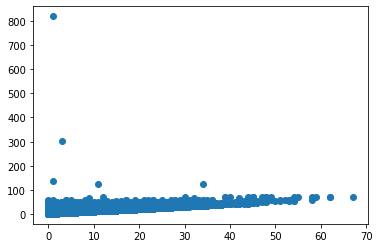

In [ ]:
plt.scatter(house.floor, house.floor_total)

In [ ]:
cor_matrix = abs(X_features.iloc[:,2:5].corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

contractArea  realArea  monthlyPay
contractArea      0.000000  0.039653    0.001163
realArea          0.039653  0.000000    0.026248
monthlyPay        0.001163  0.026248    0.000000

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 값을 저장할 데이터프레임 변수
vif = pd.DataFrame()

# 첫번째 features축은 columns이름으로
vif["features"] = X_features.columns # 독립변수들의 이름들로 구성된 features열 추가

# 두번째 축은 VIF값을 계산하여 집어넣기
vif["VIF Factor"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])] # 리스트내포

vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features  VIF Factor
0          floor    1.892649
1    floor_total    2.442444
2   contractArea    1.002145
3       realArea    1.136667
4     monthlyPay    1.001119
5           단기임대         inf
6             매매         inf
7             월세         inf
8             전세         inf
9            남동향         inf
10           남서향         inf
11            남향         inf
12            동향         inf
13           북동향         inf
14           북서향         inf
15            북향         inf
16            서향         inf
17        단독/다가구         inf
18            빌라         inf
19           사무실         inf
20            상가         inf
21          상가주택         inf
22           아파트         inf
23        아파트분양권         inf
24          오피스텔         inf
25       오피스텔분양권         inf
26            원룸         inf
27           재건축         inf
28          전원주택         inf
29        dobong         inf
30    dongdaemun         inf
31       dongjak         inf
32     eunpyeong         inf
33       gangbuk         inf
34      gangdong         inf
35       gangnam         inf
36       gangseo         inf
37     guemcheon         inf
38          guro         inf
39        gwanak         inf
40      gwangjin         inf
41        jongno         inf
42          jung         inf
43      jungnang         inf
44          mapo         inf
45         nowon         inf
46        seocho         inf
47     seodaemun         inf
48      seongbuk         inf
49     seongdong         inf
50        songpa         inf
51     yangcheon         inf
52  yeongdeungpo         inf
53       yongsan         inf

In [ ]:
print('단기임대 :', X_features.loc[:,'단기임대'].corr(y_label))
print('매매 :', X_features.loc[:,'매매'].corr(y_label))
print('월세 :', X_features.loc[:,'월세'].corr(y_label))
print('전세 :', X_features.loc[:,'전세'].corr(y_label))

단기임대 : -0.04322131702056583
매매 : 0.44771413103682606
월세 : -0.43144051373177716
전세 : 0.004265357502372564


In [ ]:
X2_features = X_features.drop('전세', axis=1)
X2_features.columns

Index(['floor', 'floor_total', 'contractArea', 'realArea', 'monthlyPay',
       '단기임대', '매매', '월세', '남동향', '남서향', '남향', '동향', '북동향', '북서향', '북향', '서향',
       '단독/다가구', '빌라', '사무실', '상가', '상가주택', '아파트', '아파트분양권', '오피스텔', '오피스텔분양권',
       '원룸', '재건축', '전원주택', 'dobong', 'dongdaemun', 'dongjak', 'eunpyeong',
       'gangbuk', 'gangdong', 'gangnam', 'gangseo', 'guemcheon', 'guro',
       'gwanak', 'gwangjin', 'jongno', 'jung', 'jungnang', 'mapo', 'nowon',
       'seocho', 'seodaemun', 'seongbuk', 'seongdong', 'songpa', 'yangcheon',
       'yeongdeungpo', 'yongsan'],
      dtype='object')

In [ ]:
print('남동향 :', X2_features.loc[:,'남동향'].corr(y_label))
print('남서향 :', X2_features.loc[:,'남서향'].corr(y_label))
print('남향 :', X2_features.loc[:,'남향'].corr(y_label))
print('동향 :', X2_features.loc[:,'동향'].corr(y_label))
print('북동향 :', X2_features.loc[:,'북동향'].corr(y_label))
print('북서향 :', X2_features.loc[:,'북서향'].corr(y_label))
print('북향 :', X2_features.loc[:,'북향'].corr(y_label))
print('서향 :', X2_features.loc[:,'서향'].corr(y_label))

남동향 : 0.04451077704774645
남서향 : 0.03536025716050008
남향 : 0.1351394526612545
동향 : -0.061148113893892665
북동향 : -0.06253461643520611
북서향 : -0.06015284024832236
북향 : -0.10134241861302996
서향 : -0.09235704739018948


In [ ]:
X3_features = X2_features.drop('남서향', axis=1)
X3_features.columns

Index(['floor', 'floor_total', 'contractArea', 'realArea', 'monthlyPay',
       '단기임대', '매매', '월세', '남동향', '남향', '동향', '북동향', '북서향', '북향', '서향',
       '단독/다가구', '빌라', '사무실', '상가', '상가주택', '아파트', '아파트분양권', '오피스텔', '오피스텔분양권',
       '원룸', '재건축', '전원주택', 'dobong', 'dongdaemun', 'dongjak', 'eunpyeong',
       'gangbuk', 'gangdong', 'gangnam', 'gangseo', 'guemcheon', 'guro',
       'gwanak', 'gwangjin', 'jongno', 'jung', 'jungnang', 'mapo', 'nowon',
       'seocho', 'seodaemun', 'seongbuk', 'seongdong', 'songpa', 'yangcheon',
       'yeongdeungpo', 'yongsan'],
      dtype='object')

In [ ]:
print('단독/다가구 :', X3_features.loc[:,'단독/다가구'].corr(y_label))
print('빌라 :', X3_features.loc[:,'빌라'].corr(y_label))
print('사무실 :', X3_features.loc[:,'사무실'].corr(y_label))
print('상가 :', X3_features.loc[:,'상가'].corr(y_label))
print('상가주택 :', X3_features.loc[:,'상가주택'].corr(y_label))
print('아파트 :', X3_features.loc[:,'아파트'].corr(y_label))
print('아파트분양권 :', X3_features.loc[:,'아파트분양권'].corr(y_label))
print('오피스텔 :', X3_features.loc[:,'오피스텔'].corr(y_label))
print('오피스텔분양권 :', X3_features.loc[:,'오피스텔분양권'].corr(y_label))
print('원룸 :', X3_features.loc[:,'원룸'].corr(y_label))
print('재건축 :', X3_features.loc[:,'재건축'].corr(y_label))
print('전원주택 :', X3_features.loc[:,'전원주택'].corr(y_label))

단독/다가구 : -0.09554870762992174
빌라 : -0.06727272925697303
사무실 : -0.1838263934560244
상가 : -0.2113443907883824
상가주택 : -0.03704601347921209
아파트 : 0.46100854415192166
아파트분양권 : 0.015824427512268202
오피스텔 : -0.07391798577381359
오피스텔분양권 : -0.003505295867347543
원룸 : -0.15480449690856324
재건축 : 0.0974788822098133
전원주택 : -0.002394804917188574


In [ ]:
X4_features = X3_features.drop('전원주택', axis=1)
X4_features.columns

Index(['floor', 'floor_total', 'contractArea', 'realArea', 'monthlyPay',
       '단기임대', '매매', '월세', '남동향', '남향', '동향', '북동향', '북서향', '북향', '서향',
       '단독/다가구', '빌라', '사무실', '상가', '상가주택', '아파트', '아파트분양권', '오피스텔', '오피스텔분양권',
       '원룸', '재건축', 'dobong', 'dongdaemun', 'dongjak', 'eunpyeong', 'gangbuk',
       'gangdong', 'gangnam', 'gangseo', 'guemcheon', 'guro', 'gwanak',
       'gwangjin', 'jongno', 'jung', 'jungnang', 'mapo', 'nowon', 'seocho',
       'seodaemun', 'seongbuk', 'seongdong', 'songpa', 'yangcheon',
       'yeongdeungpo', 'yongsan'],
      dtype='object')

In [ ]:
print('dobong :', X3_features.loc[:,'dobong'].corr(y_label))
print('dongdaemun :', X3_features.loc[:,'dongdaemun'].corr(y_label))
print('dongjak :', X3_features.loc[:,'dongjak'].corr(y_label))
print('eunpyeong :', X3_features.loc[:,'eunpyeong'].corr(y_label))
print('gangbuk :', X3_features.loc[:,'gangbuk'].corr(y_label))
print('gangdong :', X3_features.loc[:,'gangdong'].corr(y_label))
print('gangnam :', X3_features.loc[:,'gangnam'].corr(y_label))
print('gangseo :', X3_features.loc[:,'gangseo'].corr(y_label))
print('guemcheon :', X3_features.loc[:,'guemcheon'].corr(y_label))
print('guro :', X3_features.loc[:,'guro'].corr(y_label))
print('gwangjin :', X3_features.loc[:,'gwangjin'].corr(y_label))
print('jongno :', X3_features.loc[:,'jongno'].corr(y_label))
print('jung :', X3_features.loc[:,'jung'].corr(y_label))
print('jungnang :', X3_features.loc[:,'jungnang'].corr(y_label))
print('mapo :', X3_features.loc[:,'mapo'].corr(y_label))
print('nowon :', X3_features.loc[:,'nowon'].corr(y_label))
print('seocho :', X3_features.loc[:,'seocho'].corr(y_label))
print('seodaemun :', X3_features.loc[:,'seodaemun'].corr(y_label))
print('seongbuk :', X3_features.loc[:,'seongbuk'].corr(y_label))
print('seongdong :', X3_features.loc[:,'seongdong'].corr(y_label))
print('songpa :', X3_features.loc[:,'songpa'].corr(y_label))
print('yangcheon :', X3_features.loc[:,'yangcheon'].corr(y_label))
print('yeongdeungpo :', X3_features.loc[:,'yeongdeungpo'].corr(y_label))
print('yongsan :', X3_features.loc[:,'yongsan'].corr(y_label))

dobong : -0.04741469870880867
dongdaemun : -0.016023993008939304
dongjak : 0.002280112681186405
eunpyeong : -0.027072361350473886
gangbuk : -0.06502932150204885
gangdong : 0.013547734436923326
gangnam : 0.058793771911713304
gangseo : -0.038956335302236966
guemcheon : -0.06270752347784138
guro : -0.013627708801802885
gwangjin : -0.018917935338724087
jongno : -0.012330368212881781
jung : -0.028729568253057225
jungnang : -0.04656798235262538
mapo : 0.003916834205950642
nowon : -0.01691518667956358
seocho : 0.15640396357176506
seodaemun : 0.001765725711598774
seongbuk : 0.0054534139360520135
seongdong : 0.044159879188745074
songpa : 0.029282300432688726
yangcheon : 0.021010923016623145
yeongdeungpo : -0.0027468792758584175
yongsan : 0.1369107585728592


In [ ]:
X5_features = X4_features.drop('seodaemun', axis=1)
X5_features.columns

Index(['floor', 'floor_total', 'contractArea', 'realArea', 'monthlyPay',
       '단기임대', '매매', '월세', '남동향', '남향', '동향', '북동향', '북서향', '북향', '서향',
       '단독/다가구', '빌라', '사무실', '상가', '상가주택', '아파트', '아파트분양권', '오피스텔', '오피스텔분양권',
       '원룸', '재건축', 'dobong', 'dongdaemun', 'dongjak', 'eunpyeong', 'gangbuk',
       'gangdong', 'gangnam', 'gangseo', 'guemcheon', 'guro', 'gwanak',
       'gwangjin', 'jongno', 'jung', 'jungnang', 'mapo', 'nowon', 'seocho',
       'seongbuk', 'seongdong', 'songpa', 'yangcheon', 'yeongdeungpo',
       'yongsan'],
      dtype='object')

In [ ]:
vif2 = pd.DataFrame()

# 첫번째 features축은 columns이름으로
vif2["features"] = X5_features.columns # 독립변수들의 이름들로 구성된 features열 추가

# 두번째 축은 VIF값을 계산하여 집어넣기
vif2["VIF Factor"] = [variance_inflation_factor(X5_features.values, i) for i in range(X5_features.shape[1])] # 리스트내포

vif2

features  VIF Factor
0          floor    3.905215
1    floor_total    6.629043
2   contractArea    1.002905
3       realArea    1.471846
4     monthlyPay    1.001189
5           단기임대    1.041720
6             매매    2.361066
7             월세    3.809788
8            남동향    2.249221
9             남향    3.298693
10            동향    2.043337
11           북동향    1.313437
12           북서향    1.267157
13            북향    1.501520
14            서향    1.607908
15        단독/다가구    2.387381
16            빌라    7.551670
17           사무실    6.051807
18            상가    6.735116
19          상가주택    1.190273
20           아파트   16.692378
21        아파트분양권    1.093229
22          오피스텔    3.357504
23       오피스텔분양권    1.083742
24            원룸    3.199645
25           재건축    1.253494
26        dobong    2.105359
27    dongdaemun    2.057605
28       dongjak    2.091838
29     eunpyeong    2.105184
30       gangbuk    1.996955
31      gangdong    2.101420
32       gangnam    2.074405
33       gangseo    2.193273
34     guemcheon    1.954995
35          guro    2.104244
36        gwanak    2.175528
37      gwangjin    2.083448
38        jongno    1.931097
39          jung    2.077717
40      jungnang    2.081926
41          mapo    2.049266
42         nowon    2.149816
43        seocho    2.165734
44      seongbuk    2.063776
45     seongdong    2.028559
46        songpa    2.108171
47     yangcheon    2.131500
48  yeongdeungpo    2.117138
49       yongsan    2.073250

In [ ]:
X6_features = X5_features.drop('아파트', axis=1)
X6_features.columns

Index(['floor', 'floor_total', 'contractArea', 'realArea', 'monthlyPay',
       '단기임대', '매매', '월세', '남동향', '남향', '동향', '북동향', '북서향', '북향', '서향',
       '단독/다가구', '빌라', '사무실', '상가', '상가주택', '아파트분양권', '오피스텔', '오피스텔분양권', '원룸',
       '재건축', 'dobong', 'dongdaemun', 'dongjak', 'eunpyeong', 'gangbuk',
       'gangdong', 'gangnam', 'gangseo', 'guemcheon', 'guro', 'gwanak',
       'gwangjin', 'jongno', 'jung', 'jungnang', 'mapo', 'nowon', 'seocho',
       'seongbuk', 'seongdong', 'songpa', 'yangcheon', 'yeongdeungpo',
       'yongsan'],
      dtype='object')

## 데이터 분할 & 스케일링

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X6_features, y_label, train_size=0.7, test_size=0.3, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(63553, 49) (27238, 49) (63553,) (27238,)


In [ ]:
train_X[:5]

floor  floor_total  contractArea  realArea  monthlyPay  단기임대  매매  월세  \
27565      4            5            51        27           0     0   0   0   
63591     13           17            82        59           0     0   0   0   
52246      3            5            76        66         230     0   0   1   
14691      1            2            36        36          90     0   0   1   
15530      1            5           166       149           0     0   1   0   

       남동향  남향  ...  jungnang  mapo  nowon  seocho  seongbuk  seongdong  \
27565    0   0  ...         0     0      0       0         0          0   
63591    0   0  ...         0     0      0       0         0          0   
52246    0   0  ...         0     1      0       0         0          0   
14691    0   0  ...         0     0      0       0         0          0   
15530    0   0  ...         0     0      0       0         0          0   

       songpa  yangcheon  yeongdeungpo  yongsan  
27565       0          0             0        0  
63591       0          0             0        0  
52246       0          0             0        0  
14691       0          0             0        0  
15530       0          0             0        0  

[5 rows x 49 columns]

In [ ]:
#sklearn 패키지 preprocessing 모듈에서 StandardScaler 가져오기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #빈 스케일러 생성
scaler = scaler.fit(train_X) #위 스케일러를 새로운 train_X에 맞는 스케일러로 만들어준다
#주의) fit할 때는 무조건 train_X로 스케일러를 만들어줘야한다. 테스트 세트는 모델 구현에 일절 관여해선 안 됨!

train_X_scaled = scaler.transform(train_X) #train_X 데이터를 변환
test_X_scaled = scaler.transform(test_X) #test_X 데이터를 변환
print(test_X_scaled[:5])

[[ 3.45683128e-01  9.66011060e-01 -9.42872696e-03 -1.59842345e-01
  -1.49203244e-02 -6.27168297e-02  1.41392989e+00 -7.95242326e-01
  -4.66808730e-01  1.44871871e+00 -4.10396764e-01 -2.03826195e-01
  -1.85992863e-01 -2.43598556e-01 -2.89866728e-01 -2.09373975e-01
  -4.92450185e-01 -3.52356887e-01 -4.00821896e-01 -7.52662284e-02
  -7.05774908e-02 -2.44864529e-01 -4.25769139e-02 -2.47918194e-01
  -7.87804641e-02 -2.08594856e-01 -2.03532909e-01 -2.06284249e-01
  -2.07153249e-01 -1.95040092e-01 -2.05162442e-01 -2.00622660e-01
  -2.12183382e-01 -1.88603091e-01 -2.09005220e-01 -2.01554413e-01
  -2.06739820e-01 -1.86083398e-01 -2.00961901e-01 -2.03323202e-01
  -2.05287341e-01 -2.10558530e-01 -2.11818691e-01 -2.04787362e-01
   4.96456369e+00 -2.06905274e-01 -2.11899778e-01 -2.08471615e-01
  -2.02650911e-01]
 [-8.56076704e-01 -1.24960244e+00 -1.31587806e-02 -3.83051952e-01
  -4.26568084e-03 -6.27168297e-02 -7.07248646e-01  1.25747834e+00
  -4.66808730e-01 -6.90265124e-01 -4.10396764e-01 -2.0382

## LinearRegression

In [ ]:
# 회귀(y값이 연속형변수)의 평가지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    # MSE는 제곱이기에 값이 큼으로 r-MSE(root)를 이용한다.
    # MSE는 scikit-learn의 mean_squared_error()로 계산
    rmse_val = np.sqrt(mean_squared_error(y,pred))
    # MAE는 scikit-learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)

    # (r-MSE & MAE)를 출력 후, 반환해주는 함수
    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))
    return (rmse_val, mae_val)

RMSE: 51687.680, MAE: 25392.182


<BarContainer object of 2 artists>

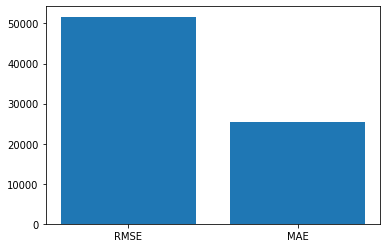

In [ ]:
from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(train_X_scaled, train_y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
pred = lr_model.predict(test_X_scaled) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

In [ ]:
print(lr_model.coef_)
print(lr_model.intercept_) 

[  2698.94786179   9279.41594475     75.57652507  13362.49178034
   -238.50985275  -3044.95896927  20214.10373513 -15935.17191676
    -50.5488818    1834.57627373  -1895.99669462   -376.25256317
   -588.25538507  -1045.08922271  -1321.65961446  -3596.52849335
 -11890.02121327 -11699.36321705  -6364.4507464   -1310.63881528
   -159.16159165 -11651.88942257  -1937.20974506  -4464.85223111
   2136.95749268  -3649.579566     -491.33376715   1627.51895209
  -1434.1131911   -1948.5493276    1135.62568415   7531.9336653
     74.45442889  -1264.30770758  -2282.71082858   -609.68004546
   2161.14908586   1737.69649301    821.67251054  -1127.454739
   2246.11495211  -4053.38669643  11842.28791147  -1879.50267102
   3151.21495781   3520.95988209    909.16026479    868.6097319
   9645.82029344]
50807.34767831573


In [ ]:
linear_beta = lr_model.coef_
linear_intercept = lr_model.intercept_

for i in range(len(linear_beta)):
  print(f"{train_X.columns[i]} : {linear_beta[i]: .2f}")
print(f"Intercept(Beta0) :{linear_intercept: .2f}")

floor :  2698.95
floor_total :  9279.42
contractArea :  75.58
realArea :  13362.49
monthlyPay : -238.51
단기임대 : -3044.96
매매 :  20214.10
월세 : -15935.17
남동향 : -50.55
남향 :  1834.58
동향 : -1896.00
북동향 : -376.25
북서향 : -588.26
북향 : -1045.09
서향 : -1321.66
단독/다가구 : -3596.53
빌라 : -11890.02
사무실 : -11699.36
상가 : -6364.45
상가주택 : -1310.64
아파트분양권 : -159.16
오피스텔 : -11651.89
오피스텔분양권 : -1937.21
원룸 : -4464.85
재건축 :  2136.96
dobong : -3649.58
dongdaemun : -491.33
dongjak :  1627.52
eunpyeong : -1434.11
gangbuk : -1948.55
gangdong :  1135.63
gangnam :  7531.93
gangseo :  74.45
guemcheon : -1264.31
guro : -2282.71
gwanak : -609.68
gwangjin :  2161.15
jongno :  1737.70
jung :  821.67
jungnang : -1127.45
mapo :  2246.11
nowon : -4053.39
seocho :  11842.29
seongbuk : -1879.50
seongdong :  3151.21
songpa :  3520.96
yangcheon :  909.16
yeongdeungpo :  868.61
yongsan :  9645.82
Intercept(Beta0) : 50807.35


## 성능평가: MSE, R2

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error # R^2, MSE

In [ ]:
r2_score(train_y, lr_model.predict(train_X_scaled)) #r2_score(실제값, 예측값)

0.49831972697594007

In [ ]:
mean_squared_error(train_y, lr_model.predict(train_X_scaled)) #mean_squared_error(실제값, 예측값)

2419573806.3764644

In [ ]:
#R2, MSE 값으로 평가 (train set에 대해) - 보기 좋게 출력
print("R2 for multiple linear regression model : {:.2f}".format(r2_score(train_y, lr_model.predict(train_X_scaled))))
print("MSE for multiple linear regression model : {:.2f}".format(mean_squared_error(train_y, lr_model.predict(train_X_scaled))))

R2 for multiple linear regression model : 0.50
MSE for multiple linear regression model : 2419573806.38


In [ ]:
#R2, MSE 값으로 평가 (test_data에 대해) - 보기 좋게 출력
print("R2 for multiple linear regression model : {:.2f}".format(r2_score(test_y, lr_model.predict(test_X_scaled))))
print("MSE for multiple linear regression model : {:.2f}".format(mean_squared_error(test_y, lr_model.predict(test_X_scaled))))

R2 for multiple linear regression model : 0.47
MSE for multiple linear regression model : 2671616275.07


## Ridge, Lasso

In [ ]:
# 데이터 전처리에 사용되는 라이브러리
from sklearn.model_selection import cross_val_score

# 규제항이 있는 선형회귀 관련 라이브러리
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# hyper-parameter 후보
alpha_list = [0.001, 0.01, 0.1, 1, 10]


# 모델 평가와 관련된 라이브러리
from sklearn import metrics
from sklearn.metrics import r2_score # R^2

# 각 모델을 비교하기 위한 평가지표인 r2-score를 저장할 장소
ridge_r2_list_train = []
ridge_r2_list_test = []
lasso_r2_list_train = []
lasso_r2_list_test = []

# 모든 'hyper-parameter'에 대해 하나씩 수행
for alpha in alpha_list:

    # 모델 객체 선언; Ridge(), Lasso()
    # alpha <- hyper-parameter 하나씩 대입
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    


    # # 이전처럼 'k-fold학습'을 쓰지 않고, 그냥 학습
    # ridge_model.fit(train_X,train_y)
    # lasso_model.fit(train_X,train_y)
    # #테스트; sklearn.metrics에 있는 r2_score()함수를 가져와 평가
    # ridge_r2_list_test.append(r2_score(test_y,ridge_model.predict(test_X)))
    # lasso_r2_list_test.append(r2_score(test_y,lasso_model.predict(test_X)))


    # kfold 통해 성능평가; 즉, train_set을 8:2로 나누는 것을 10번 반복해서 학습을 진행하는 것이다.
    # cross_val_score()에서 scoring='r2'로 두고 평가
    # 즉, train_set만을 가지고 학습 및 평가(검증)를 진행한다.
    # test_set은 사용하지 않는다.
    ridge_r2_list_train.append(np.mean(cross_val_score(ridge_model,train_X_scaled,train_y,scoring='r2',cv=10)))
    lasso_r2_list_train.append(np.mean(cross_val_score(lasso_model,train_X_scaled,train_y,scoring='r2',cv=10)))
    

In [ ]:
ridge_r2_list_train

[0.5006348204318284,
 0.5006348216773876,
 0.5006348341309234,
 0.5006349584607086,
 0.5006361812714946]

In [ ]:
lasso_r2_list_train

[0.5006348222021092,
 0.5006348393890077,
 0.5006350109389023,
 0.5006367000495113,
 0.5006527745654632]

In [ ]:
ridge = Ridge(alpha=1.0).fit(train_X_scaled, train_y) #Ridge 모델 생성
lasso = Lasso(alpha=1.0).fit(train_X_scaled, train_y) #Lasso 모델 생성

In [ ]:
# Ridge: 규제항이 회귀계수의 제곱합이므로 회귀계수들이 딱 0이 되지는 않고, 0에 가까워진다.
print(ridge.coef_)
print(ridge.intercept_)

[  2699.12396625   9279.75320954     75.58221313  13362.21240851
   -238.50196644  -3044.9120016   20213.83660585 -15935.11049977
    -50.50290263   1834.65488849  -1895.97737968   -376.30424538
   -588.30820584  -1045.15013586  -1321.70196193  -3596.23693938
 -11889.31145985 -11698.73927661  -6363.9429757   -1310.53558304
   -159.21818218 -11651.48889999  -1937.12738717  -4464.55060898
   2137.04335258  -3649.99494255   -491.81872672   1627.0119999
  -1434.57389484  -1949.00067766   1135.10618385   7531.29381155
     73.90738949  -1264.82697179  -2283.1668161    -610.19823492
   2160.5602709    1737.18419425    821.10553091  -1127.96169588
   2245.56542768  -4053.7360112   11841.56721289  -1879.92634605
   3150.70289232   3520.35427284    908.67275881    868.06459513
   9645.13914636]
50807.34767831573


In [ ]:
ridge_beta = ridge.coef_
ridge_intercept = ridge.intercept_

for i in range(len(ridge_beta)):
  print(f"{train_X.columns[i]} : {ridge_beta[i]: .2f}")
print(f"Intercept(Beta0) :{ridge_intercept: .2f}")

floor :  2699.12
floor_total :  9279.75
contractArea :  75.58
realArea :  13362.21
monthlyPay : -238.50
단기임대 : -3044.91
매매 :  20213.84
월세 : -15935.11
남동향 : -50.50
남향 :  1834.65
동향 : -1895.98
북동향 : -376.30
북서향 : -588.31
북향 : -1045.15
서향 : -1321.70
단독/다가구 : -3596.24
빌라 : -11889.31
사무실 : -11698.74
상가 : -6363.94
상가주택 : -1310.54
아파트분양권 : -159.22
오피스텔 : -11651.49
오피스텔분양권 : -1937.13
원룸 : -4464.55
재건축 :  2137.04
dobong : -3649.99
dongdaemun : -491.82
dongjak :  1627.01
eunpyeong : -1434.57
gangbuk : -1949.00
gangdong :  1135.11
gangnam :  7531.29
gangseo :  73.91
guemcheon : -1264.83
guro : -2283.17
gwanak : -610.20
gwangjin :  2160.56
jongno :  1737.18
jung :  821.11
jungnang : -1127.96
mapo :  2245.57
nowon : -4053.74
seocho :  11841.57
seongbuk : -1879.93
seongdong :  3150.70
songpa :  3520.35
yangcheon :  908.67
yeongdeungpo :  868.06
yongsan :  9645.14
Intercept(Beta0) : 50807.35


In [ ]:
# Lasso: 규제항이 회귀계수의 절댓값 합이므로 회귀계수들이 0에 수렴한다.
print(lasso.coef_)
print(lasso.intercept_)

[  2698.8980767    9283.41521478     74.59772035  13361.35572358
   -237.52367791  -3044.02260334  20213.58981296 -15935.81698762
    -46.52167078   1838.18754909  -1892.48943691   -374.02085224
   -586.23060058  -1042.60792386  -1319.00103728  -3593.38282748
 -11885.27404317 -11694.23462449  -6359.95401002  -1308.76996341
   -158.47834692 -11649.16778581  -1935.80582261  -4461.93759989
   2136.9435412   -3653.09815711   -494.97332734   1622.12510074
  -1437.56136122  -1952.10141957   1129.98403567   7526.16854436
     68.37025967  -1268.04717359  -2286.23863516   -613.56901323
   2155.19056108   1732.18531206    815.47637356  -1131.25271891
   2240.42474614  -4056.37621256  11836.58159708  -1882.7246057
   3145.86904615   3515.11150618    903.84364452    862.93460568
   9640.00195401]
50807.34767831573


In [ ]:
lasso_beta = lasso.coef_
lasso_intercept = lasso.intercept_

for i in range(len(lasso_beta)):
  print(f"{train_X.columns[i]} : {lasso_beta[i]: .2f}")
print(f"Intercept(Beta0) :{lasso_intercept: .2f}")

floor :  2698.90
floor_total :  9283.42
contractArea :  74.60
realArea :  13361.36
monthlyPay : -237.52
단기임대 : -3044.02
매매 :  20213.59
월세 : -15935.82
남동향 : -46.52
남향 :  1838.19
동향 : -1892.49
북동향 : -374.02
북서향 : -586.23
북향 : -1042.61
서향 : -1319.00
단독/다가구 : -3593.38
빌라 : -11885.27
사무실 : -11694.23
상가 : -6359.95
상가주택 : -1308.77
아파트분양권 : -158.48
오피스텔 : -11649.17
오피스텔분양권 : -1935.81
원룸 : -4461.94
재건축 :  2136.94
dobong : -3653.10
dongdaemun : -494.97
dongjak :  1622.13
eunpyeong : -1437.56
gangbuk : -1952.10
gangdong :  1129.98
gangnam :  7526.17
gangseo :  68.37
guemcheon : -1268.05
guro : -2286.24
gwanak : -613.57
gwangjin :  2155.19
jongno :  1732.19
jung :  815.48
jungnang : -1131.25
mapo :  2240.42
nowon : -4056.38
seocho :  11836.58
seongbuk : -1882.72
seongdong :  3145.87
songpa :  3515.11
yangcheon :  903.84
yeongdeungpo :  862.93
yongsan :  9640.00
Intercept(Beta0) : 50807.35


## 성능평가

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error # R^2, MSE

In [ ]:
print("MSE for Ridge model : {:.2f}".format(mean_squared_error(test_y, ridge.predict(test_X_scaled))))
print("MSE for Lasso model : {:.2f}".format(mean_squared_error(test_y, lasso.predict(test_X_scaled))))

MSE for Ridge model : 2671614765.96
MSE for Lasso model : 2671623589.59


In [ ]:
print("R2 score for Ridge model : {:.2f}".format(r2_score(test_y, ridge.predict(test_X_scaled))))
print("R2 score for Lasso model : {:.2f}".format(r2_score(test_y, lasso.predict(test_X_scaled))))

R2 score for Ridge model : 0.47
R2 score for Lasso model : 0.47


# 예제 2

데이터의 y값이 '연속형' -> '범주형'만 바뀔뿐 이후에 진행하는 절차는 유사하다.

위에서 사용한 데이터를 그대로 이용한다.
* 단, 이전에는 y값을 'count'라는 연속형 데이터로 선정하여, supervised & regression 문제였으나
* 이번에는 y값을 'precipitation'라는 범주형 데이터로 선정하여, supervised & classification 문제로 변경된다.

## remark; 데이터 소개 again

사용할 데이터 : bike.csv

주어진 데이터는 서울시 공공데이터인 자전거 대여 수를 나타낸 데이터로 아래와 같다. 데이터에는 자전거 대여 수와 함께 ID, 시간, 날씨 등의 정보를 포함하고 있다.

서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터
즉, 따릉이 보관소별로 매일 자전거 대여

* id : 마포구에 있는 따릉이 보관소의 고유 id
* hour : 따릉이 보관소에서 기상상황을 측정한 시간
> ex. hour=23일 경우, 23시에 기상상황을 측정했다는 의미
* temperature : 기온
* precipitation : 비가 오지 않았으면 0, 비가 오면 1, null은 비가 온 것도 아니고 안 온 것도 아니라서 센서가 확실히 측정불가한 상태
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존
* pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 측정한 날짜의 따릉이 대여 수

> 데이터 출처 : https://www.dacon.io/competitions/open/235576/data

## 데이터 불러오기

In [ ]:
path = '/content/drive/MyDrive/세션자료/bike.csv'
bike = pd.read_csv(path)
bike.head()

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  count  
0            33.0     49  
1            40.0    159  
2            19.0     26  
3            64.0     57  
4            11.0    431

## 어떤 Task인지 파악하기

데이터 구조 확인 및 어떤 task인지 파악을 한다.

In [ ]:
# (행,열)
# 행의 수 = 데이터(표본)의 갯수 = 1459
# 열의 수 = features들의 갯수 = 11

bike.shape

(1459, 11)

In [ ]:
# features 살펴보기

bike.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

(array([1404.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

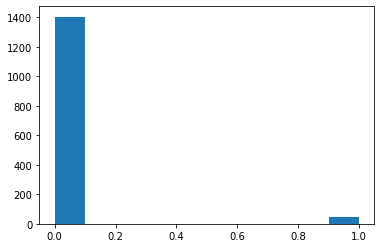

In [ ]:
# y값 = 'hour_bef_precipitation(비가 왔는지 안왔는지 여부)'열

# y(label)값 뜯어내기
y_label = bike.loc[:,'hour_bef_precipitation']

# y값 분포 확인
y_label.value_counts()
plt.hist(y_label.values)

# 결론
# y값 = exist -> Supervised
# y값 = 범주형 -> classification

In [ ]:
# 범주형 데이터(hour_bef_precipitation) 살펴보기

bike.loc[:,'hour_bef_precipitation'].value_counts()

# 해당 데이터의 경우, '0 or 1'인 binary-class를 갖는다.
# 따라서 해당 문제는 binary-classification task로 생각할 수 있다.

0.0    1404
1.0      46
Name: hour_bef_precipitation, dtype: int64

In [ ]:
# 위의 y값을 제외한 진정한 X값들로 이루어진 features 만들기

X_features = bike.drop(['hour_bef_precipitation'], axis=1)
X_features.columns # 10개의 열들이 진정한 X_features로 사용

# 즉, 10개의 X_features열들로 1개의 y_label인 'hour_bef_precipitation'를 맞추는 문제
# 여기서 행은 데이터의 갯수, 즉 이러한 갯수의 데이터를 이용해 학습을 시킨다는 의미

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [ ]:
# X_features 열들이 ['연속형','범주형']인지 확인

# 1~5번째 행(데이터)
X_features.head()

# 범주형 데이터 : 없음
# 연속형 데이터 : 나머지

id  hour  hour_bef_temperature  hour_bef_windspeed  hour_bef_humidity  \
0   3    20                  16.3                 1.5               89.0   
1   6    13                  20.1                 1.4               48.0   
2   7     6                  13.9                 0.7               79.0   
3   8    23                   8.1                 2.7               54.0   
4   9    18                  29.5                 4.8                7.0   

   hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  count  
0                576.0           0.027           76.0            33.0     49  
1                916.0           0.042           73.0            40.0    159  
2               1382.0           0.033           32.0            19.0     26  
3                946.0           0.040           75.0            64.0     57  
4               2000.0           0.057           27.0            11.0    431

* 지금까지 배운 모델 중 binary-classification 문제를 풀 수 있는 모델은 '로지스틱회귀'와 'SVM'이다.

> * 로지스틱회귀나 SVM의 경우에도, X값 중에 범주형 데이터가 있을 경우에
> * label_encoding -> one-hot_encoding으로 바꾸어주어야한다.

> * 범주형 데이터 : 'hour_bef_precipitation'
> * 연속형 데이터 : 나머지

## 데이터 전처리하기(1)
* 결측치 파악

사실상 ML에서는 데이터 전처리를 하는데 가장 오랜시간이 걸린다.

데이터 전처리의 경우, 개인의 논리와 그간의 데이터 분석경험에 따라 어느 정도 바뀌어질 수 있다. 따라서 이번 시간에 제시된 방법이 정답은 아니고, 하나의 방법으로 제시하는 측면이라는 걸 확인해주길 바랍니다.

### 결측치 처리

In [ ]:
# 항상 결측치가 있는지 확인이 필요하다.

bike.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      9
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

질문 : 결측치를 어떻게 처리할 것인가?

y값인 범주형 축(hour_bef_precipitation)의 경우,

* 데이터 구조 : 0과 1인 class에 대부분의 값이 속해있고, 2개의 값은 null값이다.

* 처리 방법
> 1. null이 있는 행을 제거한다.
> 2. null이 있는 값을 최빈값으로 바꾼다.
> 3. null이 있는 값을 새로운 class로 대입한다.

이전문제에서는 3번의 방법을 사용하여 binary-class를 3개의 class로 바꾸었다. 그러나 우리가 배운 것은 binary-class를 분류하는 방법인 logistic-regression과 svm임으로, 1 또는 2 방법을 사용해 binary-class를 유지해야한다. 따라서 이번 문제에서는 1번 방법을 사용하도록 하자.(2번 방법을 사용해도 됩니다.)



X의 경우에도 이전과 다르게 결측치의 갯수에 따라 나누지 않고, null값을 가진 데이터를 모두 제거하도록 하자.

* 해당 방법의 경우, null값의 갯수가 총 데이터의 갯수보다 적으면 사용할 수 있는 기법이다.
* 만약 null값의 갯수가 많은데 null값을 가진 행을 삭제한다면, 남은 데이터는 얼마 없을 것이다.

In [ ]:
# 총 데이터의 수(=행의 크기)

bike.shape[0]

1459

In [ ]:
# null값을 가진 데이터의 수(=null값이 하나라도 있는 행의 크기)

bike.isnull().any(axis=1).sum()

138

In [ ]:
# null값의 비율

bike.isnull().any(axis=1).sum() / bike.shape[0] * 100

9.458533241946538

대략 10%임으로 사실 null값이 많다고 볼 수 있지만, 위 regression에서 방법을 설명하였기에 여기서는 그냥 null값이 하나라도 있는 행을 제거하도록 한다.

In [ ]:
bike.dropna(axis=0, inplace=True)

In [ ]:
bike.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
# index 정리

bike.reset_index(drop=True, inplace=True) # drop : index열을 만들것인지 여부
bike.index

RangeIndex(start=0, stop=1321, step=1)

## 데이터 전처리하기(2)
* 범주형 X 데이터 처리 및 변수제거

사실상 ML에서는 데이터 전처리를 하는데 가장 오랜시간이 걸린다.

### 1. 범주형 X데이터 처리

해당 문제의 경우, 유일하게 범주형 변수였던 'hour_bef_precipitation'이 y값으로 사용되었기에, 따로 범주형 자료에 대한 one-hot_encoding은 필요없다. 만약 다른 데이터로 진행하여 X값 중에 범주형자료가 있다면 수행해주어야하는 절차이다.

In [ ]:
# X & y 나누기

y_label = bike.loc[:,'hour_bef_precipitation']
X_features = bike.drop(['hour_bef_precipitation'], axis=1)

### 2-0. 의미없는 변수제거

In [ ]:
# 그 자체로 의미없는 열 제거

# id열 삭제

X_features = X_features.drop(['id'], axis=1)
X_features.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

### 2-1. 다중공선성 변수제거

* 이전에는 모든 방법으로 시도했으나, 이번에는 진행해보고 필요하면 시도하자.
* 다중공선성은 사실 예측효과를 저하시키지는 않기 때문이다.


## 데이터 분할
* train_X, train_y : 모델 학습을 위한 데이터
* test_X, test_y : 학습된 모델을 평가하기 위한 데이터

X, y 를 8: 2로 데이터 분할
* stratify를 통해 y값 클래스 비율 일정하게 분할
* random_state = 1로 지정

![[0131][Session]_ LinearRegression_and_SVM (1) (1)-74 Medium.jpeg](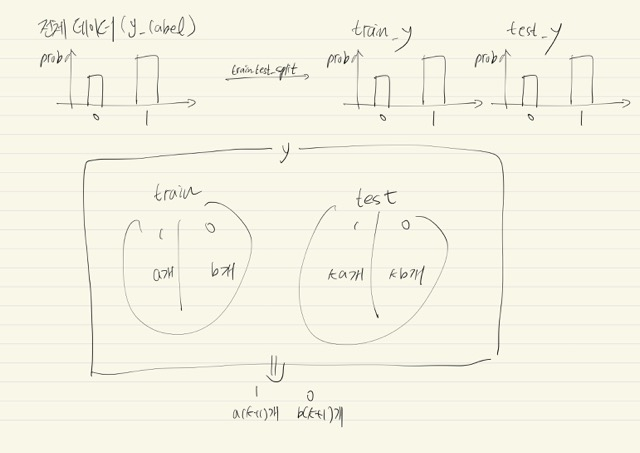)

In [ ]:
# 분류문제임으로 y값의 범주에 따른 분포가 동일하도록 데이터 분할; stratify=raw_y

train_X,test_X,train_y,test_y = train_test_split(X_features,y_label, train_size=0.8,test_size=0.2, random_state=1, stratify=y_label)
print(train_X.shape,test_X.shape, train_y.shape,test_y.shape)

(1056, 9) (265, 9) (1056,) (265,)


In [ ]:
a = train_y.value_counts()[1]
b = train_y.value_counts()[0]
ka = test_y.value_counts()[1]
kb = test_y.value_counts()[0]

In [ ]:
ka/a

0.25

In [ ]:
kb/b

0.2509765625

## 분류 평가함수

* 종류 : Accuracy, Precision, Recall, Specificity, f1-score, ROC AOU
* 참고 : https://hong-yp-ml-records.tistory.com/29

하나의 분류 모델 마다 사용하는 목적식이나 손실함수는 다르다.
> * logistic-regression : binary-cross-entropy
> * svm : margin

따라서 각 모델의 학습파라미터를 얻는데에 사용되는 것이 '목적식이나 손실함수'이고 이 모델을 다른 모델과 비교할 때는 '목적식이나 손실함수'가 다름으로, 공통적인 평가함수를 이용하여 모델 비교가 가능하다. 그리고 위에 있는 분류 평가함수가 그 종류이다.

In [ ]:
# 분류(y값이 범주형변수)의 평가지표

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

## X 데이터 Standard Scale 진행

* 분류 문제임으로, y 데이터는 범주형이고 이 y데이터의 분포를 정규화해줄 필요는 없다.

In [ ]:
scale=StandardScaler()
scale.fit(train_X) # train으로 fit을 적용하고
train_X=pd.DataFrame(scale.transform(train_X),columns=train_X.columns) # 이후에 train에 transform
test_X=pd.DataFrame(scale.transform(test_X),columns=test_X.columns) # test는 fit없이 transform만 적용한다.

## Logistic Regression

하이퍼 파라미터 값을 변경해가면서 10-Fold를 통해 학습데이터 평가 
* Logistic Regression 하이퍼파라미터 후보 : C =0.01,0.1,1,10
* 평가지표 : Recall

In [ ]:
# 이전에 사용한 cross_val_score 함수를 사용

from sklearn.model_selection import cross_val_score

In [ ]:
# 로지스틱회귀의 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression

# 하이퍼파라미터 후보
C = [0.01,0.1,1,10]
lr_score = []

# 각 하이피파라미터당
for c in C:
    # 하이퍼파라미터를 고정한 모델을 선언하고
    lr_model=LogisticRegression(C=c)
    # 10-Fold 방법으로 학습데이터에 대해 평가(평균recall)를 진행하고 이 값을 저장
    lr_score.append(np.mean(cross_val_score(
        lr_model,train_X,train_y,scoring='recall',cv=10)))

idx1 = np.array(lr_score).argsort()[::-1][0] # 가장 큰 것의 index

print(lr_score)
print('-'*50)
print('Logistic-Regression best alpha :', C[idx1])

[0.0, 0.0, 0.1, 0.16666666666666666]
--------------------------------------------------
Logistic-Regression best alpha : 10


In [ ]:
lr_score

[0.0, 0.0, 0.1, 0.16666666666666666]

## SVM

하이퍼 파라미터 값을 변경해가면서 10-Fold를 통해 학습데이터 평가

* GridSearchCV cv=5를 통해 탐색
* SVM 하이퍼파라미터 후보
> * kernel = rbf, linear, poly
> * C = 0.5, 1.5, 10
* 평가지표 : Recall

In [ ]:
# hyper-parameter의 종류가 2개(kernel, C)임으로, 이전에 사용한 cross_val_score를 이용하면
# 2개의 반복문을 사용해야한다.
# 따라서 보다 사용하기 쉬운 'GridSearchCV()'를 사용하자.
from sklearn.model_selection import GridSearchCV

# 객체 선언
from sklearn.svm import SVC # SVC = SVM + Classification vs SVR = SVM + Regression
model_svm = SVC()

# pca후의 train 데이터에 대해서 학습진행
model_svm.fit(train_X, train_y)

# HyperParameter 후보군
parameters={'kernel':['rbf','linear','poly'],
            'C':[0.5,1.5,10],
            'random_state':[1]}

# HyperParameter를 Tuning
model_svm=GridSearchCV(estimator=model_svm, param_grid=parameters,
                       scoring='recall', cv=10, refit=True)

# 객체는 이전에 'refit=True'에 의해 생성되었기에, 바로 train 데이터에 대한 학습을 진행하면 된다.
model_svm.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1.5, 10],
                         'kernel': ['rbf', 'linear', 'poly'],
                         'random_state': [1]},
             scoring='recall')

In [ ]:
model_svm.best_params_

{'C': 10, 'kernel': 'rbf', 'random_state': 1}

## 분류 모델끼리 비교

학습데이터로 평가했을 때 가장 좋은 성능을 보인 하이퍼 파라미터값을 기준으로 Logistic Regression, SVM모델 만들어 테스트 데이터로 평가
* 평가지표 Recall, Precision, F1-score

In [ ]:
# Logistic-Regression; C=10

lr_model=LogisticRegression(C=10)
lr_model.fit(train_X,train_y)

# SVM; C=10, kernel=rbf
model_svm = SVC(C=10, kernel='rbf')
model_svm.fit(train_X,train_y)

# 평가지표 또한, (정답,예측값) 순으로 넣어주어야한다.

# Logistic-Regression
print("recall :", recall_score(test_y,lr_model.predict(test_X)))
print("precision :", precision_score(test_y,lr_model.predict(test_X)))
print("f1_score :", f1_score(test_y,lr_model.predict(test_X)))
print('-'*50)

# SVM
print("recall :", recall_score(test_y,model_svm.predict(test_X)))
print("precision :", precision_score(test_y,model_svm.predict(test_X)))
print("f1_score :", f1_score(test_y,model_svm.predict(test_X)))

recall : 0.625
precision : 0.8333333333333334
f1_score : 0.7142857142857143
--------------------------------------------------
recall : 0.5
precision : 0.6666666666666666
f1_score : 0.5714285714285715


## 변수중요도; SVM

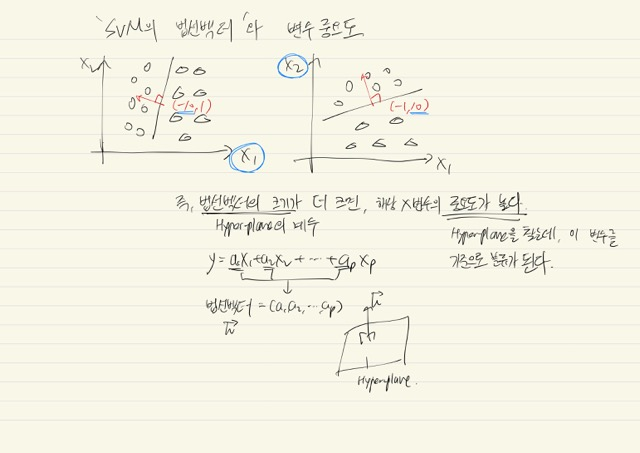

In [ ]:
# model_svm.coef_

AttributeError: ignored

In [ ]:
# SVM; C=10, kernel=rbf
model_svm = SVC(C=10, kernel='linear')
model_svm.fit(train_X,train_y)

model_svm.coef_

array([[ 2.06945722e-04,  1.50665199e-04,  3.68931722e-05,
         4.04350042e-04,  8.78720149e-05,  3.84863838e-05,
         1.76938586e-04, -4.82010014e-05, -6.55866575e-04]])

# 이론 문제

(직접 종이나 아이패드에 써서 코랩에 이미지 파일로 업로드 해주시면 됩니다)

**1.SVM의 수리적 모델링에서, 목적함수를 적고 증명과정을 서술하시오**

**2. 시그모이드 함수의 공식, 정의역, 치역을 작성하시오**

**3. 코드 실습 영상을 참고하여, 아래 그림과 같은 데이터의 F1-score를 계산하시오**


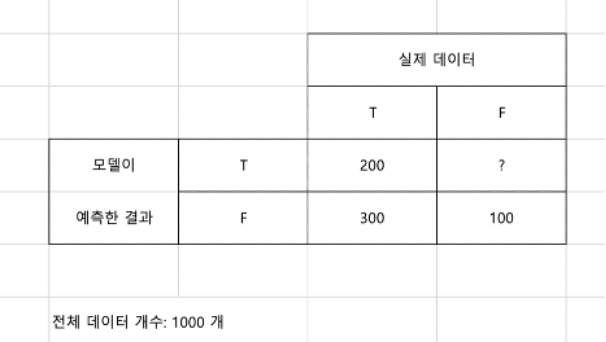

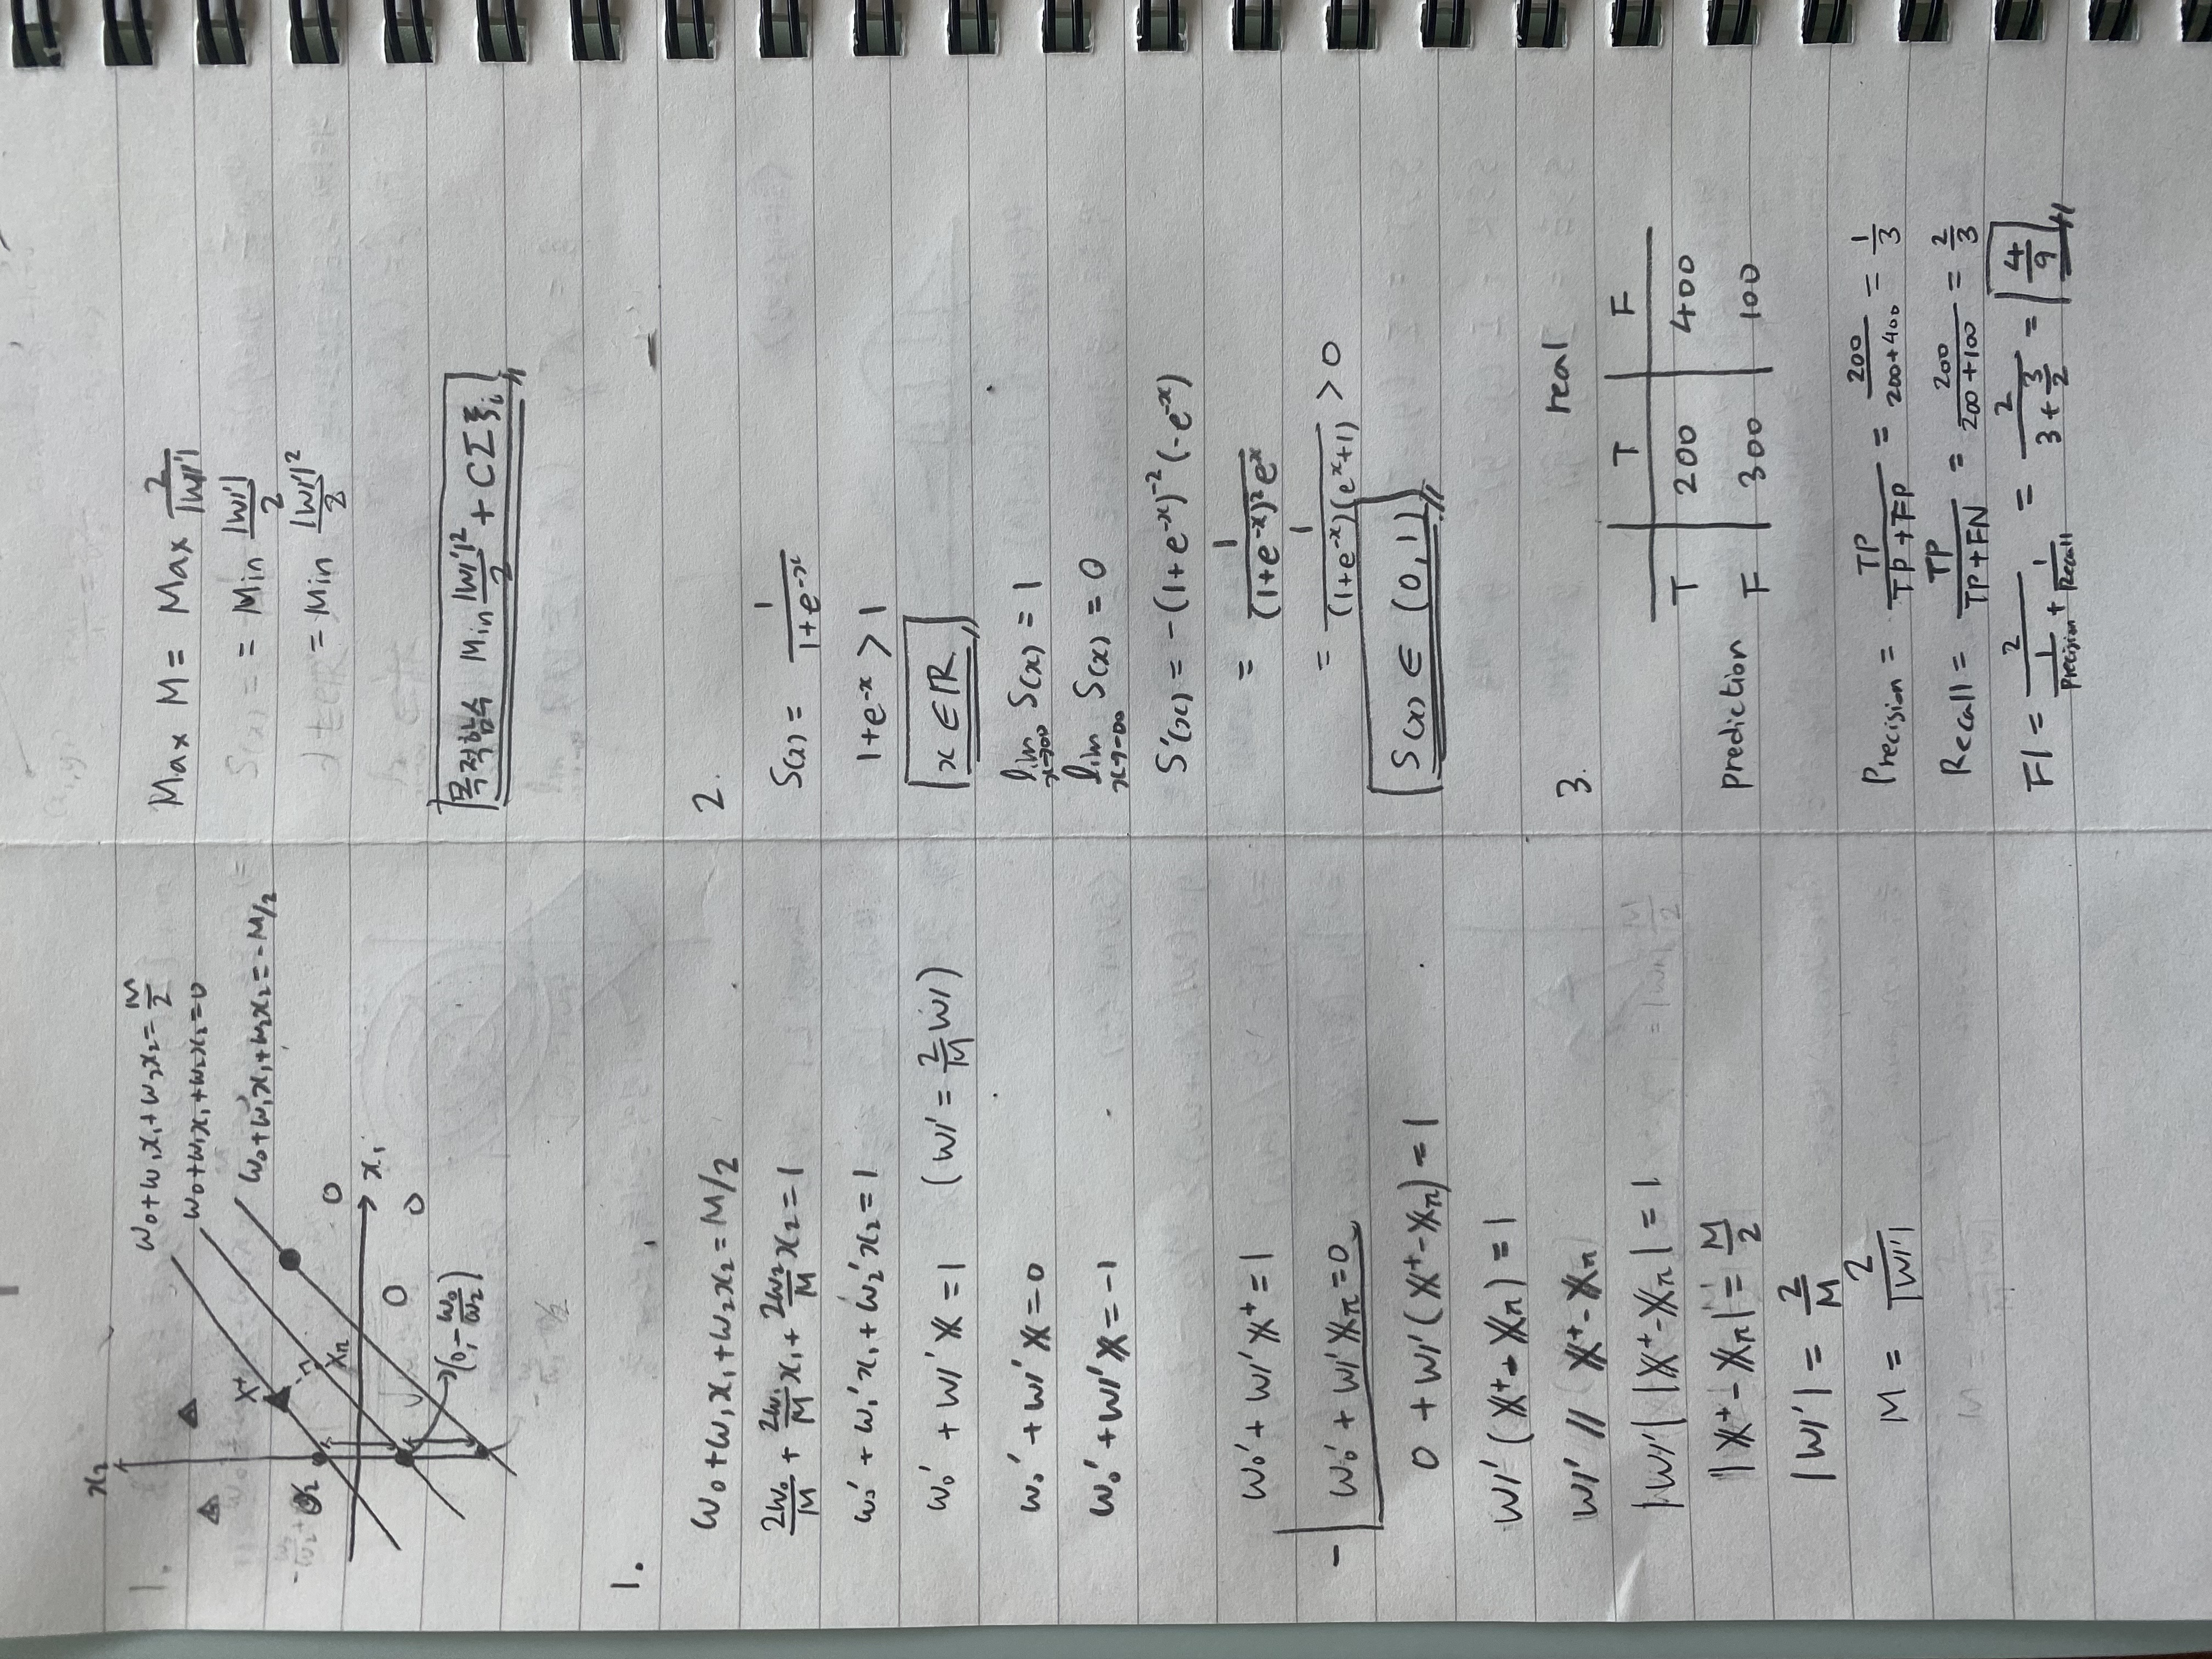

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 더 공부하고 싶으신 분들을 위한 자료
세션에서 다룬 내용을 하나하나 직접 구현해보실 수 있습니다.

**Chapter 3 – Classification**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

**Chapter 4 – Training Models**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

**Chapter 5 – Support Vector Machines**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>